In [194]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: C:\Users\jean-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [195]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: C:\Users\jean-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [196]:
import os
import numpy as np
import pandas as pd
import sklearn as skl
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [197]:
datapath = os.path.join('data', 'US', 'us_data.csv')
dus = pd.read_csv(datapath, index_col=0)

In [198]:
dus

RPI    INDPRO    UNRATE  UEMP5TO14    PAYEMS    USGOOD  \
2003-04-01  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-02  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-03  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-04  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
2003-04-07  0.004111 -0.006278  0.016807   0.035964 -0.000484 -0.003744   
...              ...       ...       ...        ...       ...       ...   
2024-12-24  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-26  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-27  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-30  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   
2024-12-31  0.001065  0.010677 -0.024098  -0.032515  0.002034  0.000185   

              USCONS    MANEMP   DMANEMP  NDMANEMP  ...  DCOILWTICO  FEDFUNDS  \
2003-04-01  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.054781  0.007968   
2003-04-02  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.032055  0.007968   
2003-04-03  0.005246 -0.007706 -0.008612 -0.006242  ...    0.017362  0.007968   
2003-04-04  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.022277  0.007968   
2003-04-07  0.005246 -0.007706 -0.008612 -0.006242  ...   -0.023145  0.007968   
...              ...       ...       ...       ...  ...         ...       ...   
2024-12-24  0.001811 -0.000783 -0.001895  0.001031  ...    0.019520 -0.035091   
2024-12-26  0.001811 -0.000783 -0.001895  0.001031  ...    0.019520 -0.035091   
2024-12-27  0.001811 -0.000783 -0.001895  0.001031  ...    0.012707 -0.035091   
2024-12-30  0.001811 -0.000783 -0.001895  0.001031  ...    0.006293 -0.035091   
2024-12-31  0.001811 -0.000783 -0.001895  0.001031  ...    0.009850 -0.035091   

             CURRCIR  BOGMBASE   WSHOSHO   WSHOTSL  T5YIE  T10YIE  \
2003-04-01  0.005315  0.006078  0.000906  0.000906  -0.01    0.02   
2003-04-02  0.005315  0.006078  0.000906  0.000906   0.02    0.01   
2003-04-03  0.005315  0.006078  0.000906  0.000906  -0.02   -0.02   
2003-04-04  0.005315  0.006078  0.000906  0.000906  -0.01   -0.01   
2003-04-07  0.005315  0.006078  0.000906  0.000906  -0.02    0.02   
...              ...       ...       ...       ...    ...     ...   
2024-12-24  0.001086 -0.002210 -0.001087 -0.001610   0.01    0.03   
2024-12-26  0.001086 -0.002210 -0.000479  0.000039   0.01    0.03   
2024-12-27  0.001086 -0.002210 -0.000479  0.000039  -0.01   -0.01   
2024-12-30  0.001086 -0.002210 -0.000479  0.000039  -0.03   -0.03   
2024-12-31  0.001086 -0.002210 -0.000479  0.000039   0.03    0.03   

            log return gold  log return sp500  
2003-04-01        -0.007018          0.012071  
2003-04-02        -0.015396          0.025781  
2003-04-03        -0.014099         -0.005064  
2003-04-04         0.000983          0.002735  
2003-04-07        -0.008324          0.001228  
...                     ...               ...  
2024-12-24         0.000103          0.010982  
2024-12-26         0.008091         -0.000406  
2024-12-27        -0.005493         -0.011117  
2024-12-30        -0.005592         -0.010760  
2024-12-31         0.007045         -0.004294  

[5477 rows x 78 columns]

In [199]:
cols_inf = dus.columns[np.isinf(dus.to_numpy()).any(axis=0)]
print(cols_inf)

Index([], dtype='object')


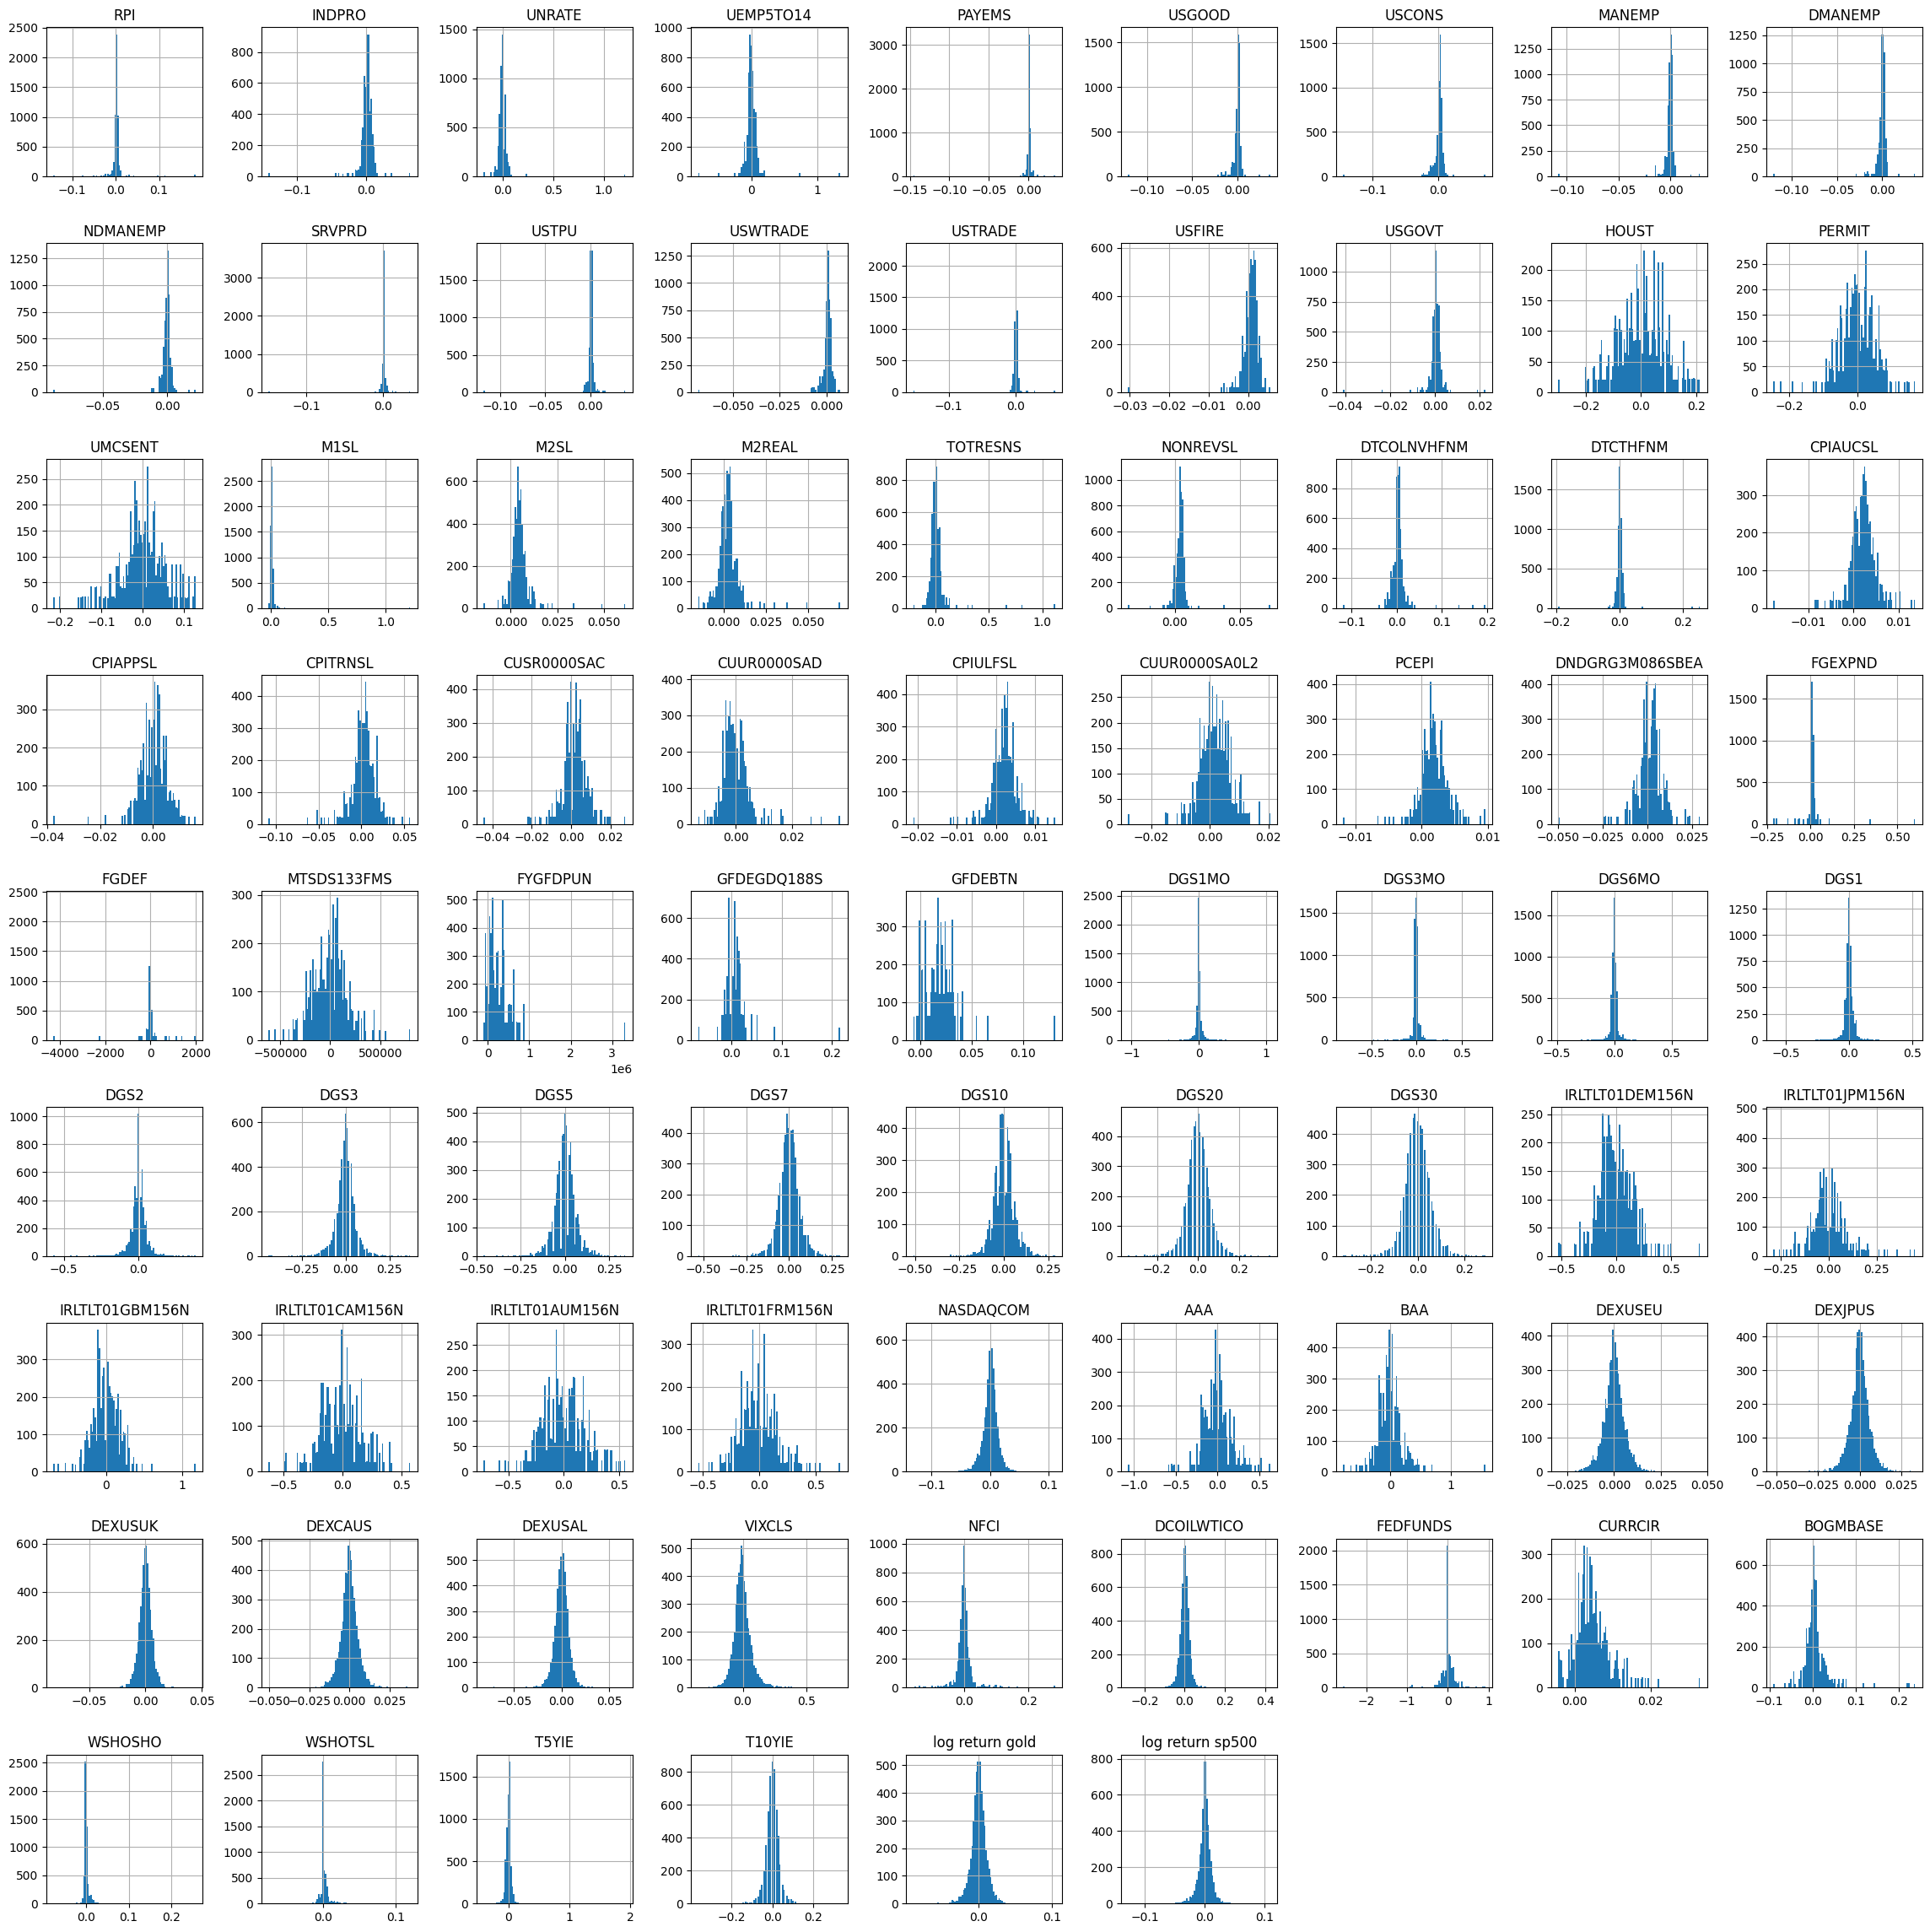

In [200]:
dus.hist(figsize=(23, 23), bins=100)
plt.tight_layout()

In [201]:
labels = pd.to_datetime(dus.index).strftime('%Y-%m')

In [202]:
labels.unique()

Index(['2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01',
       ...
       '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
       '2024-09', '2024-10', '2024-11', '2024-12'],
      dtype='object', length=261)

Let's check again that data looks stationary:

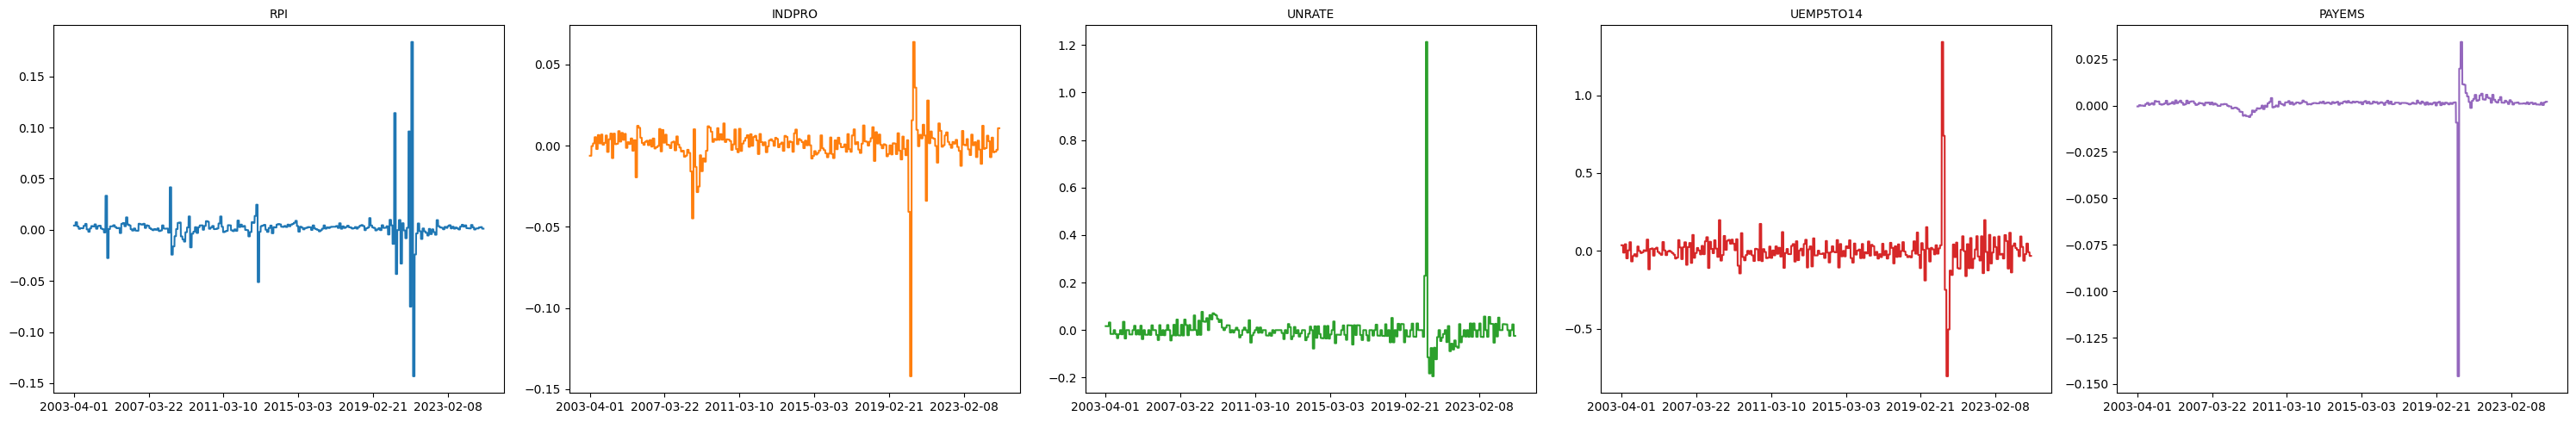

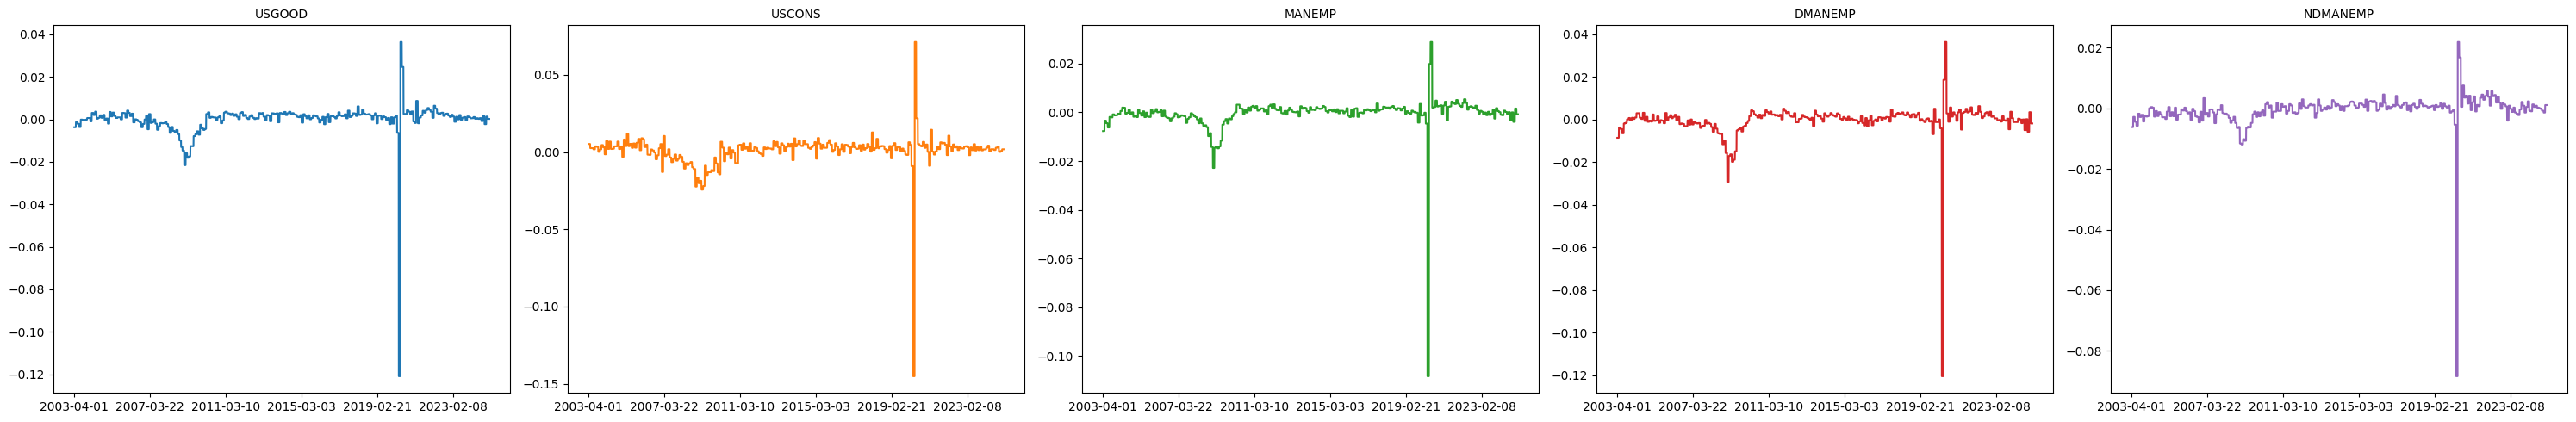

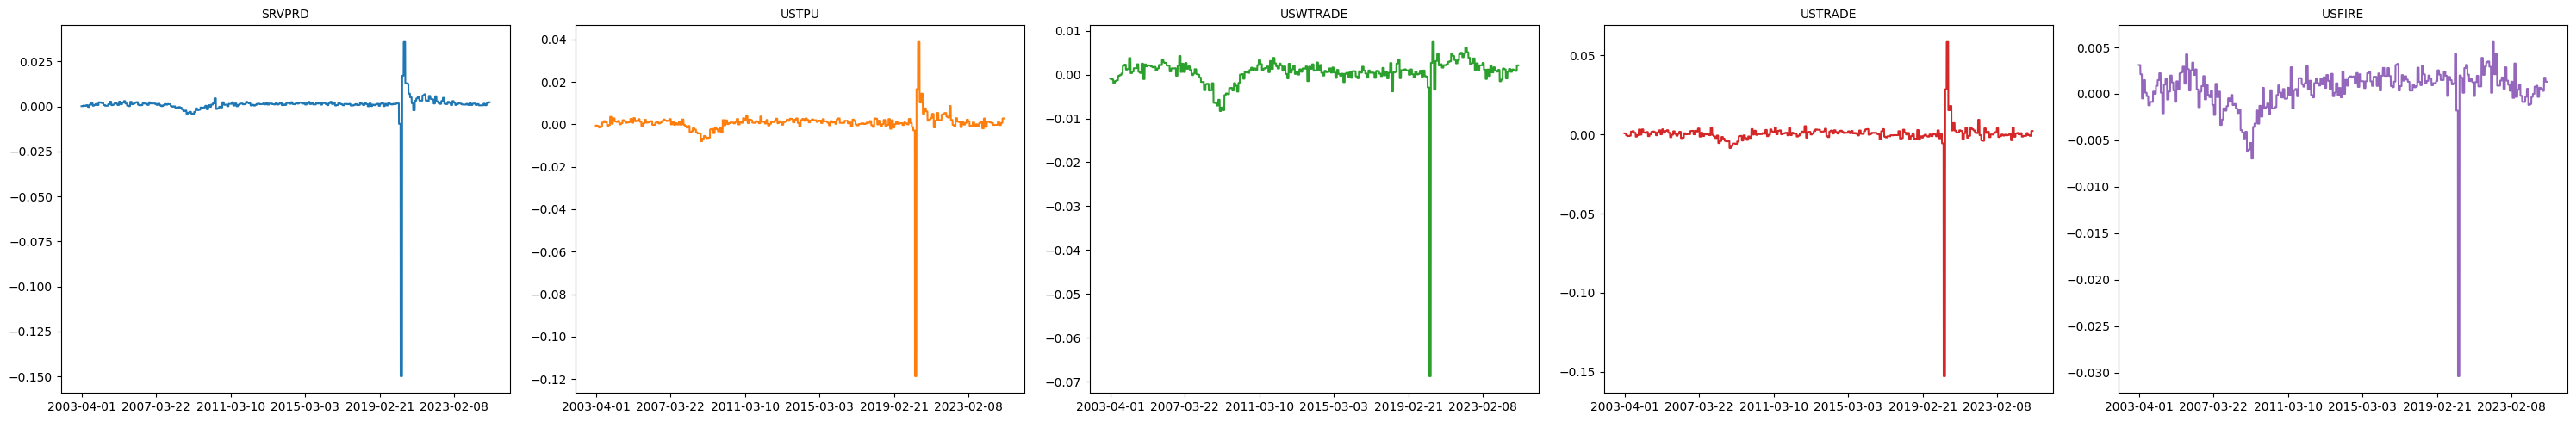

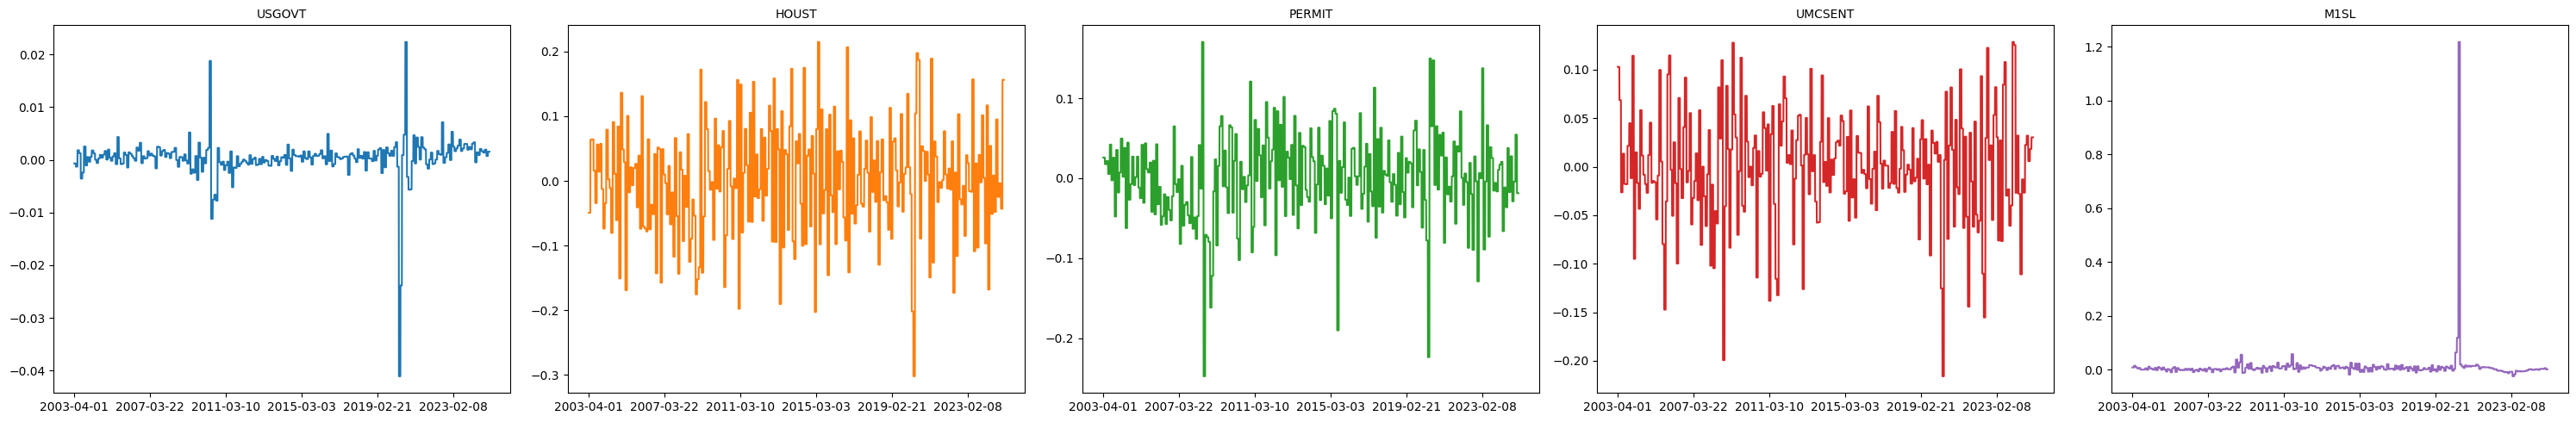

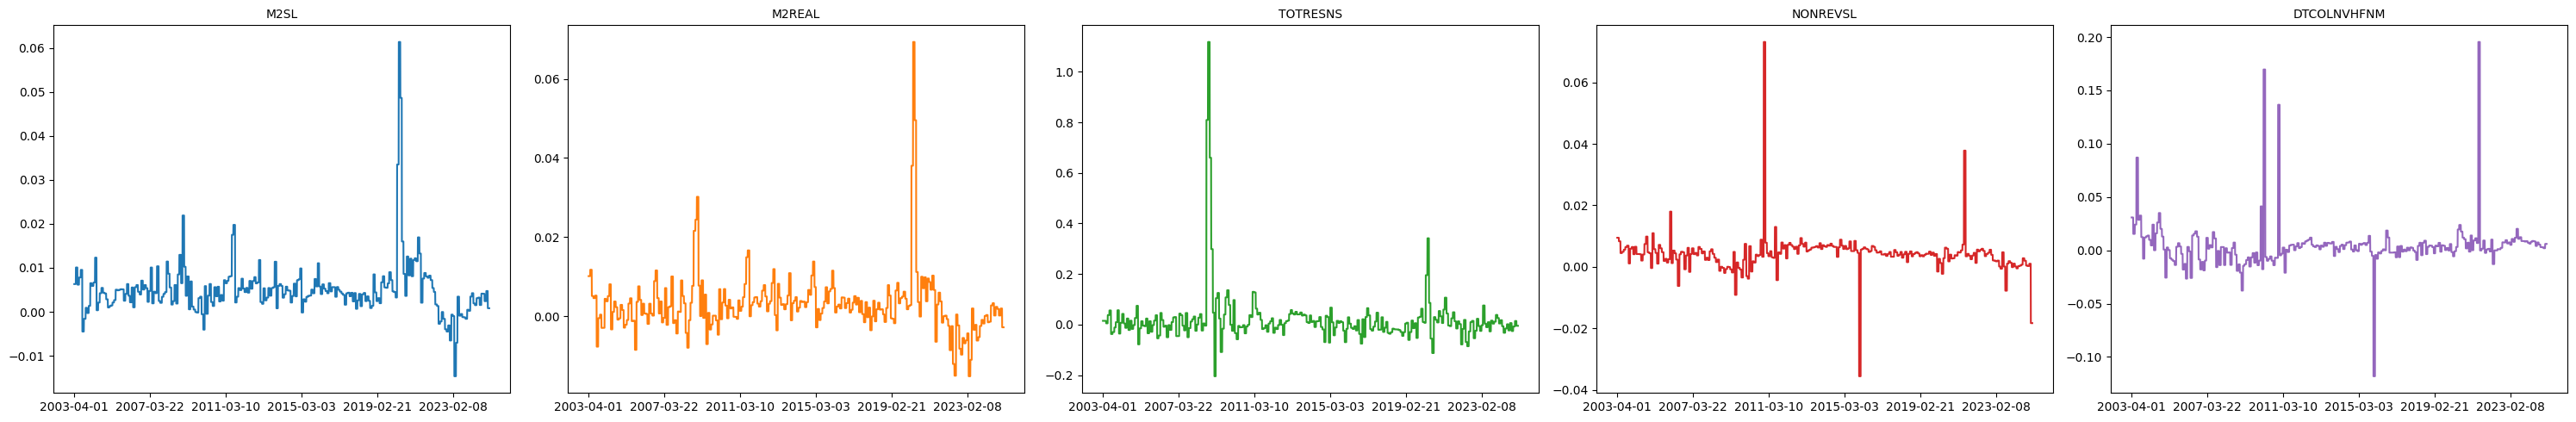

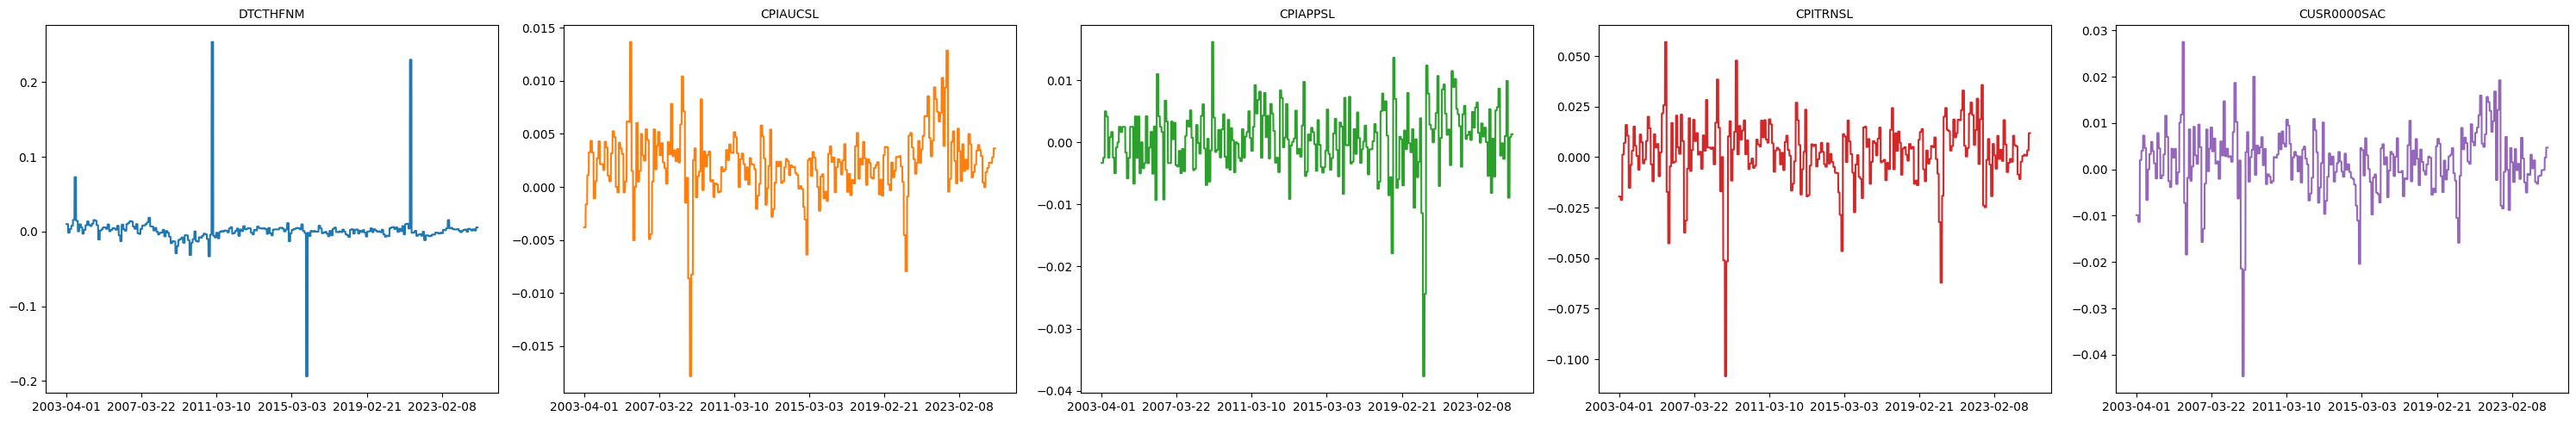

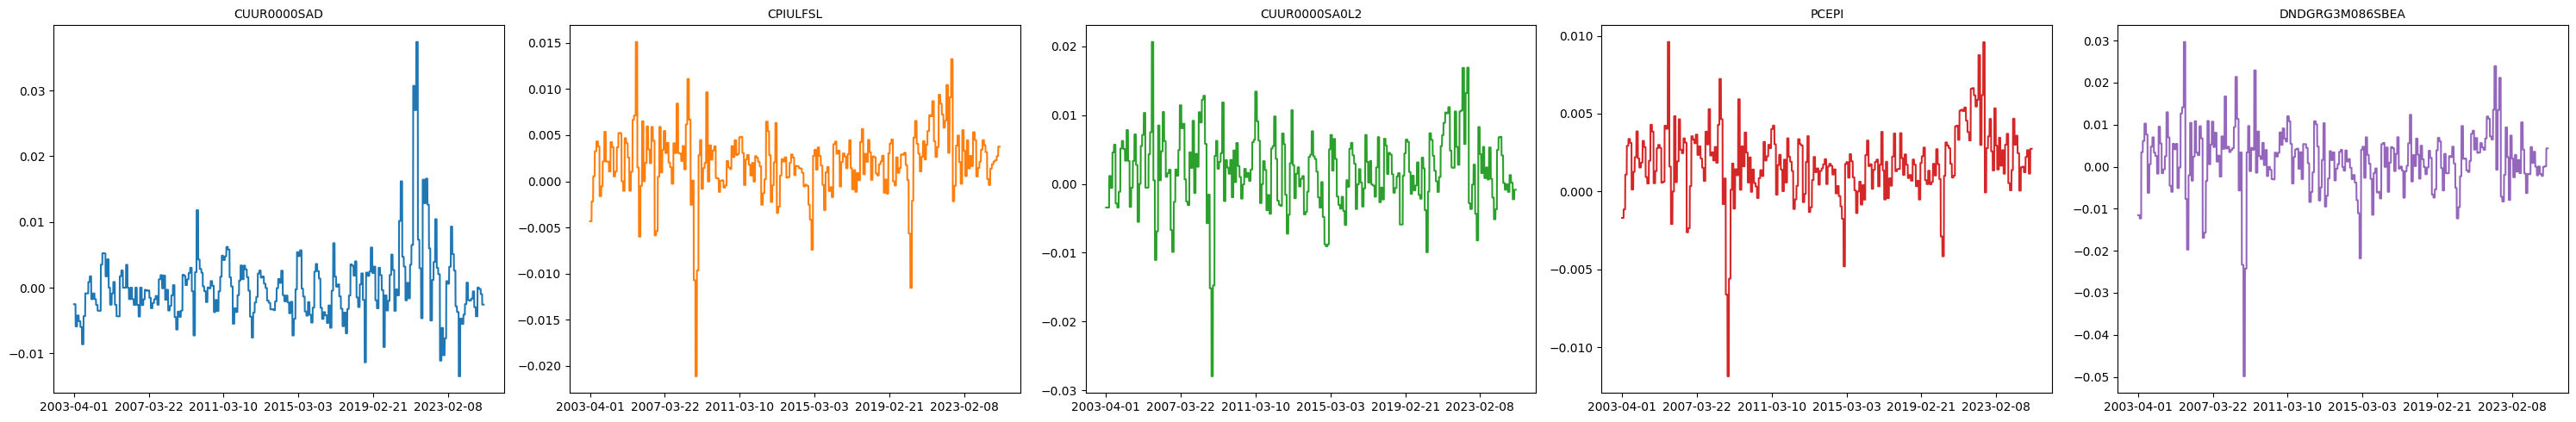

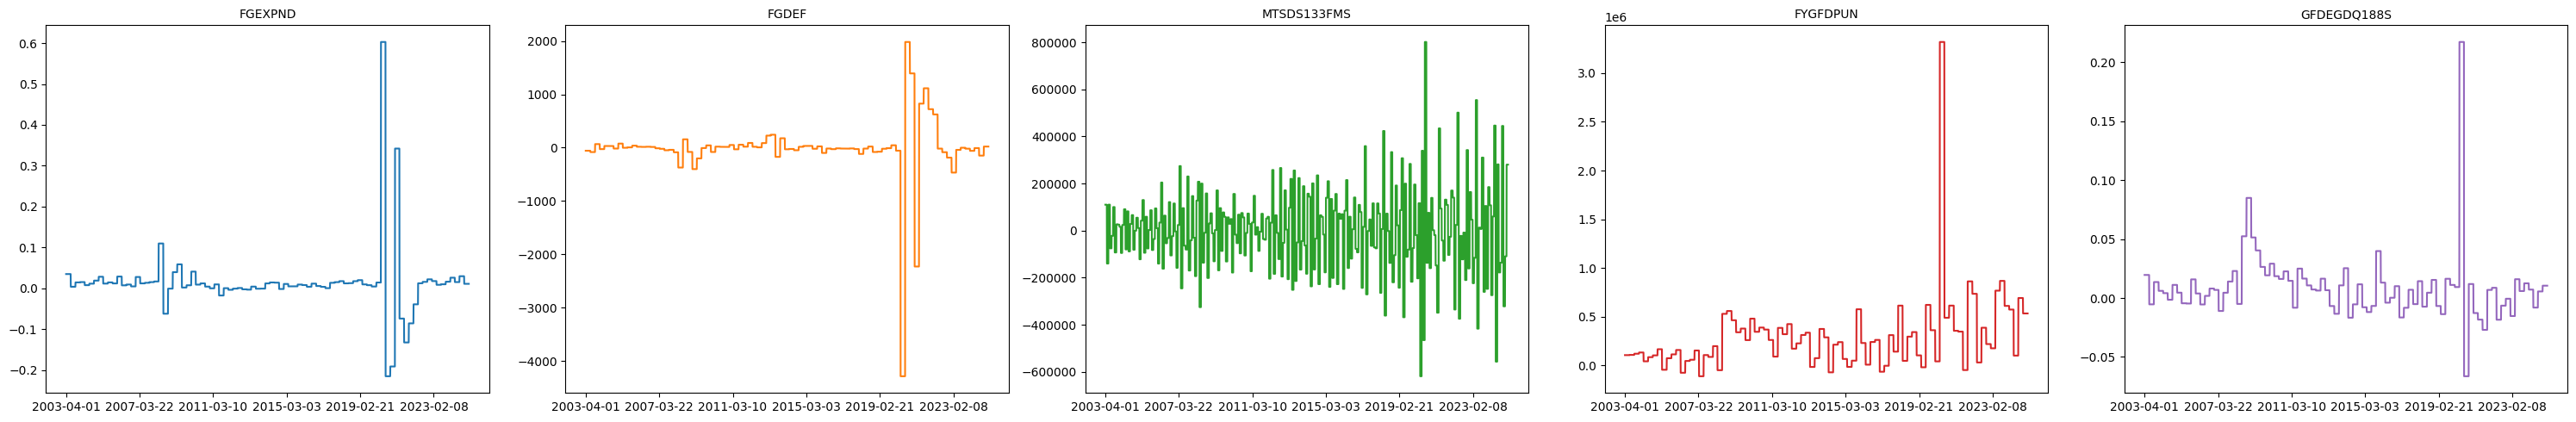

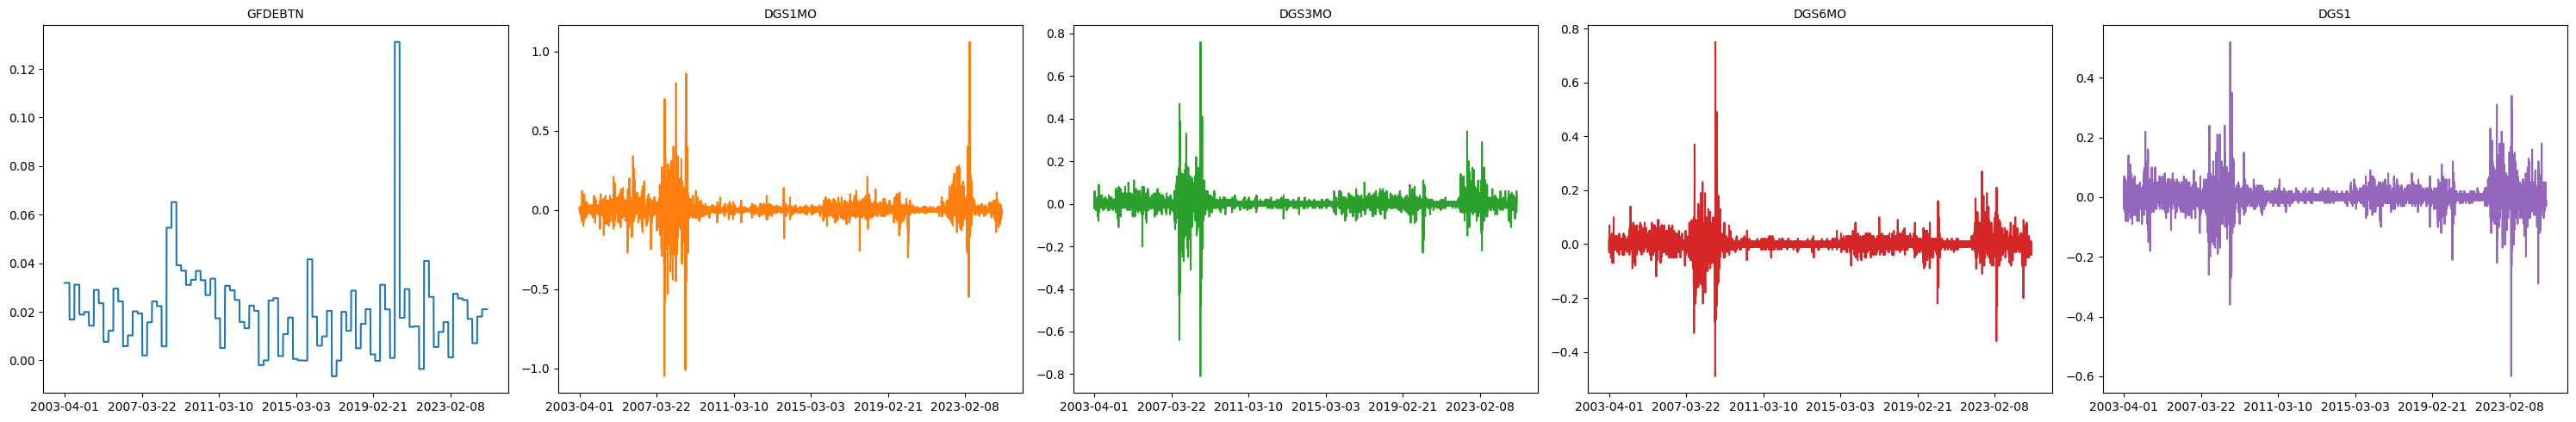

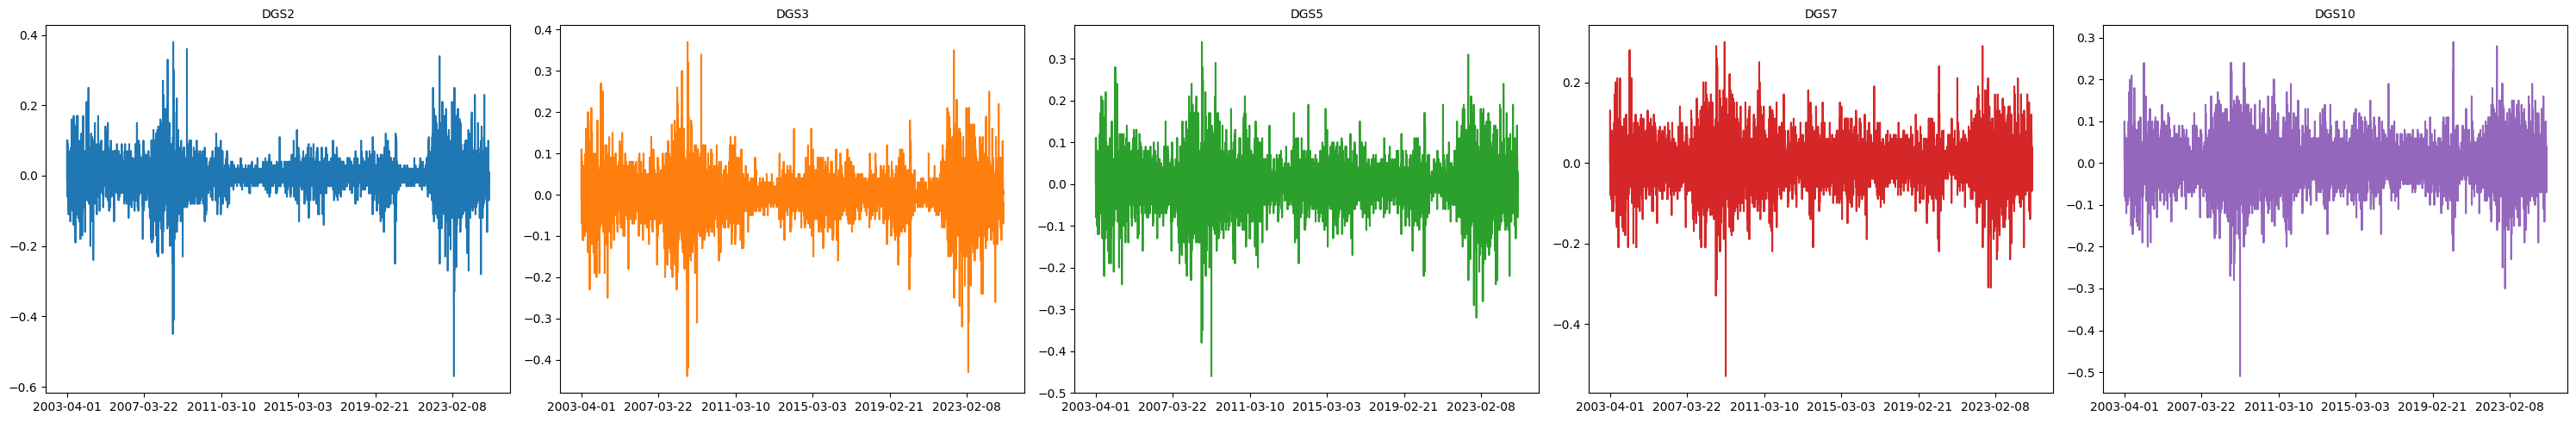

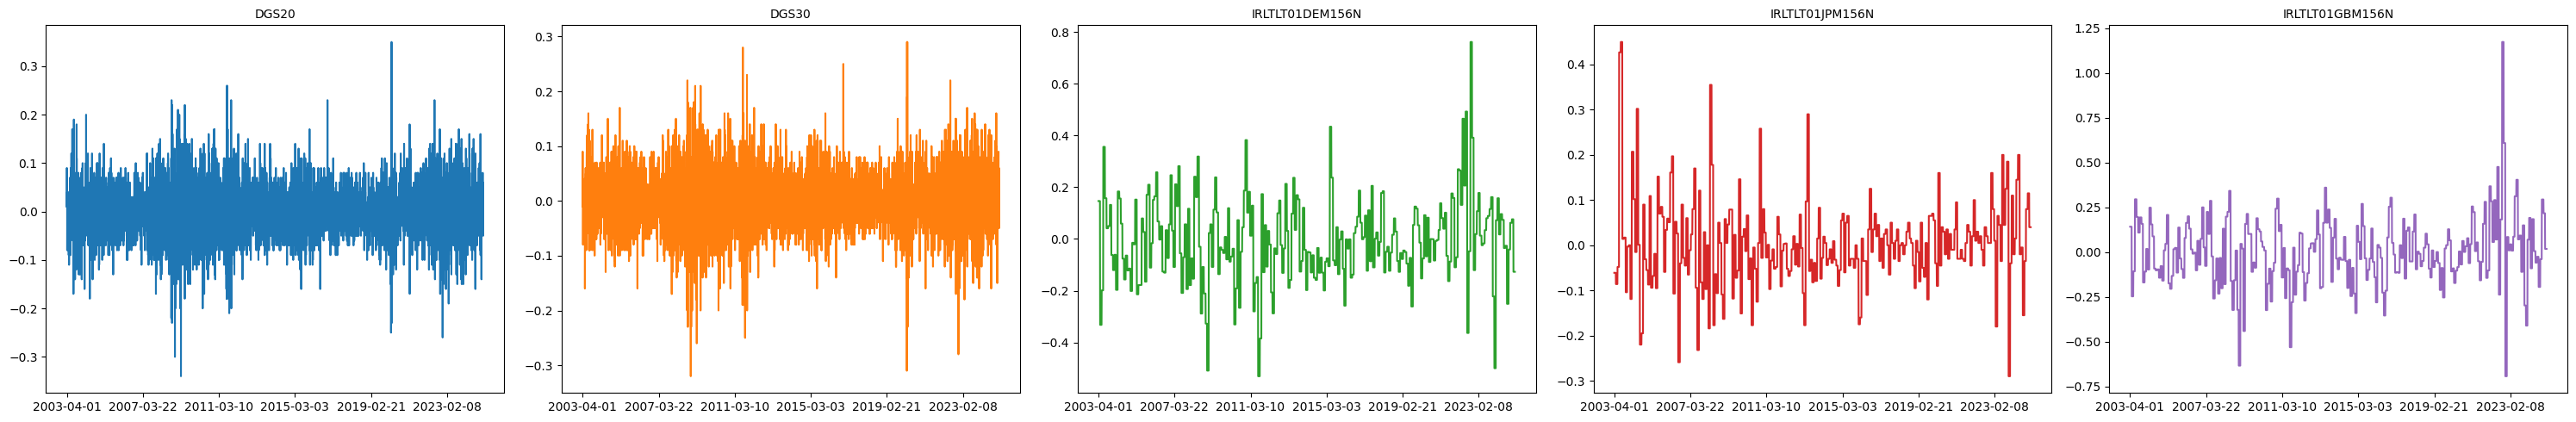

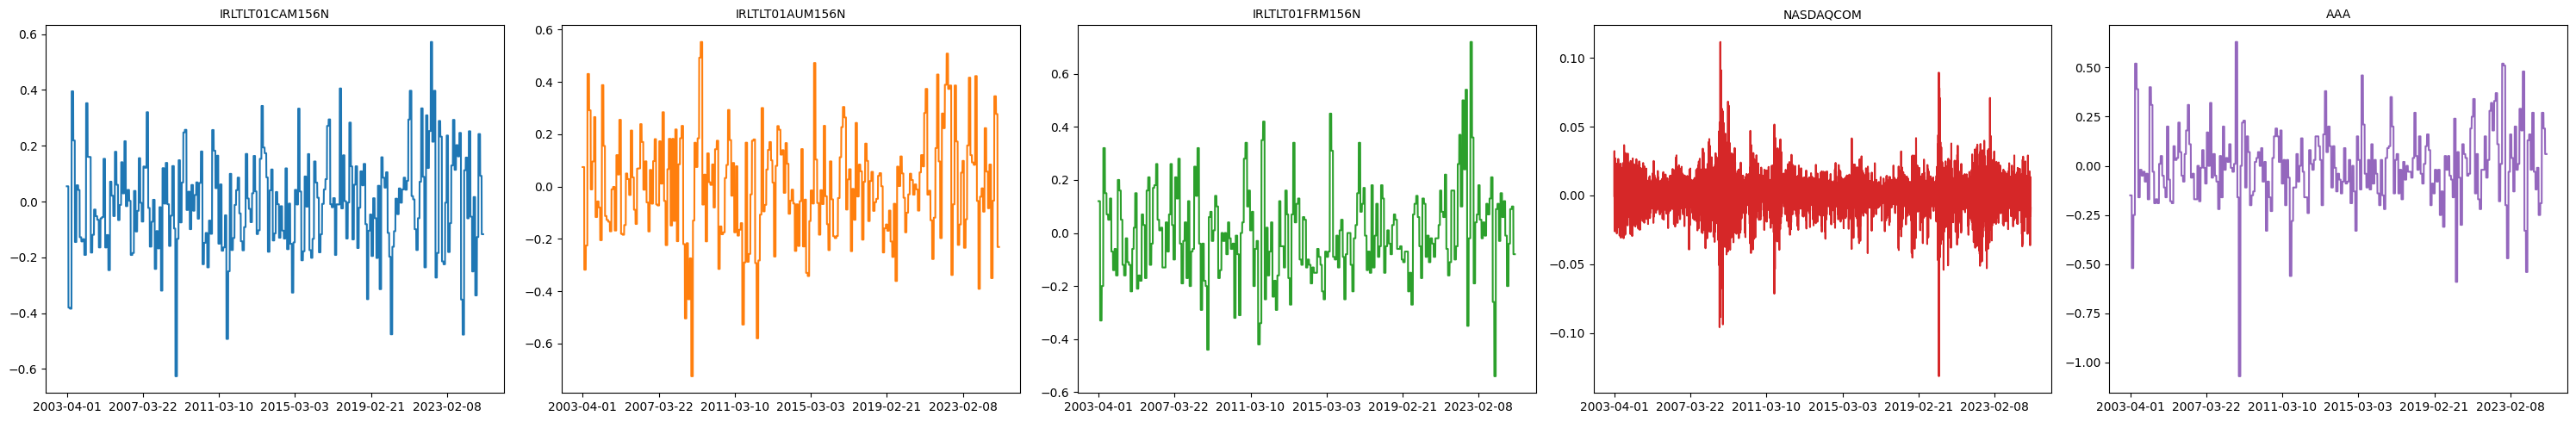

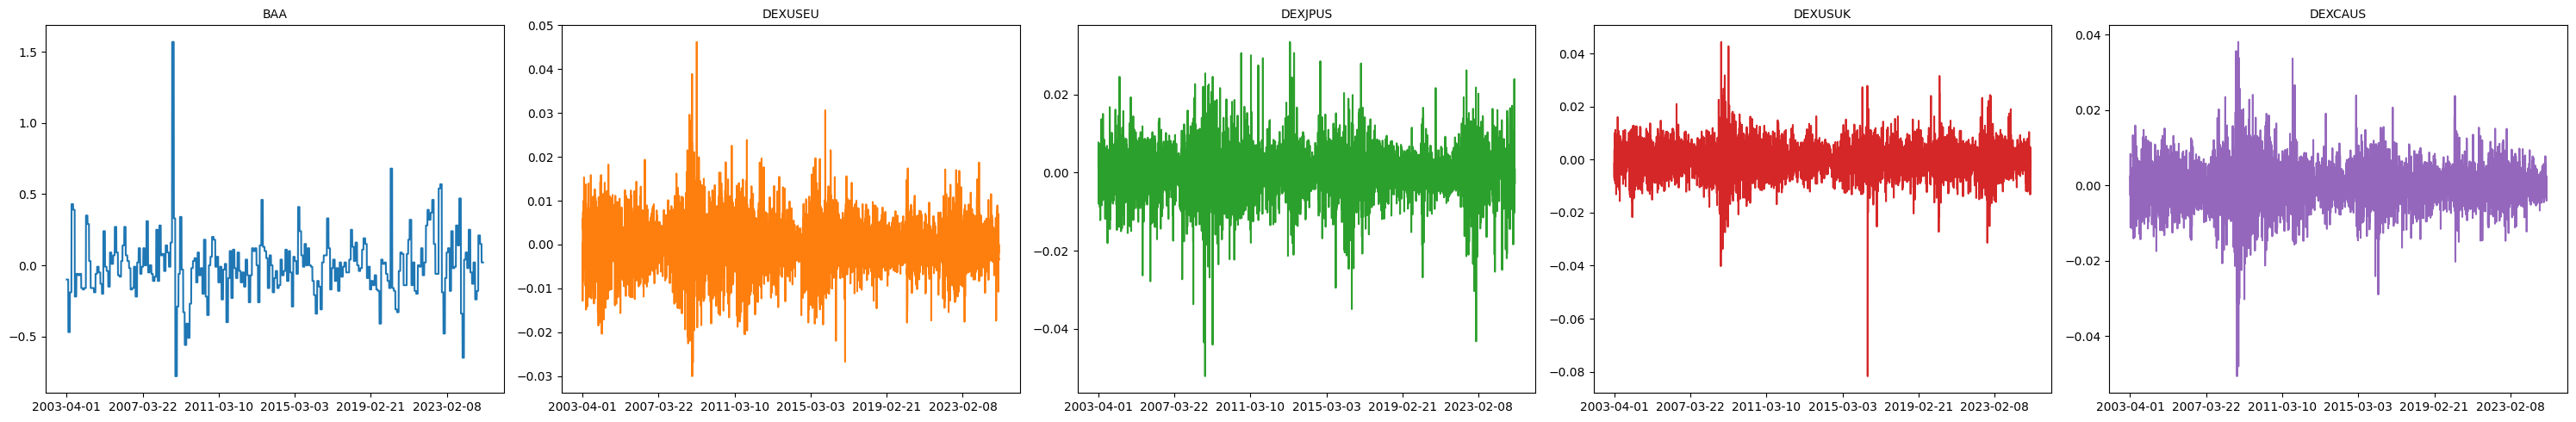

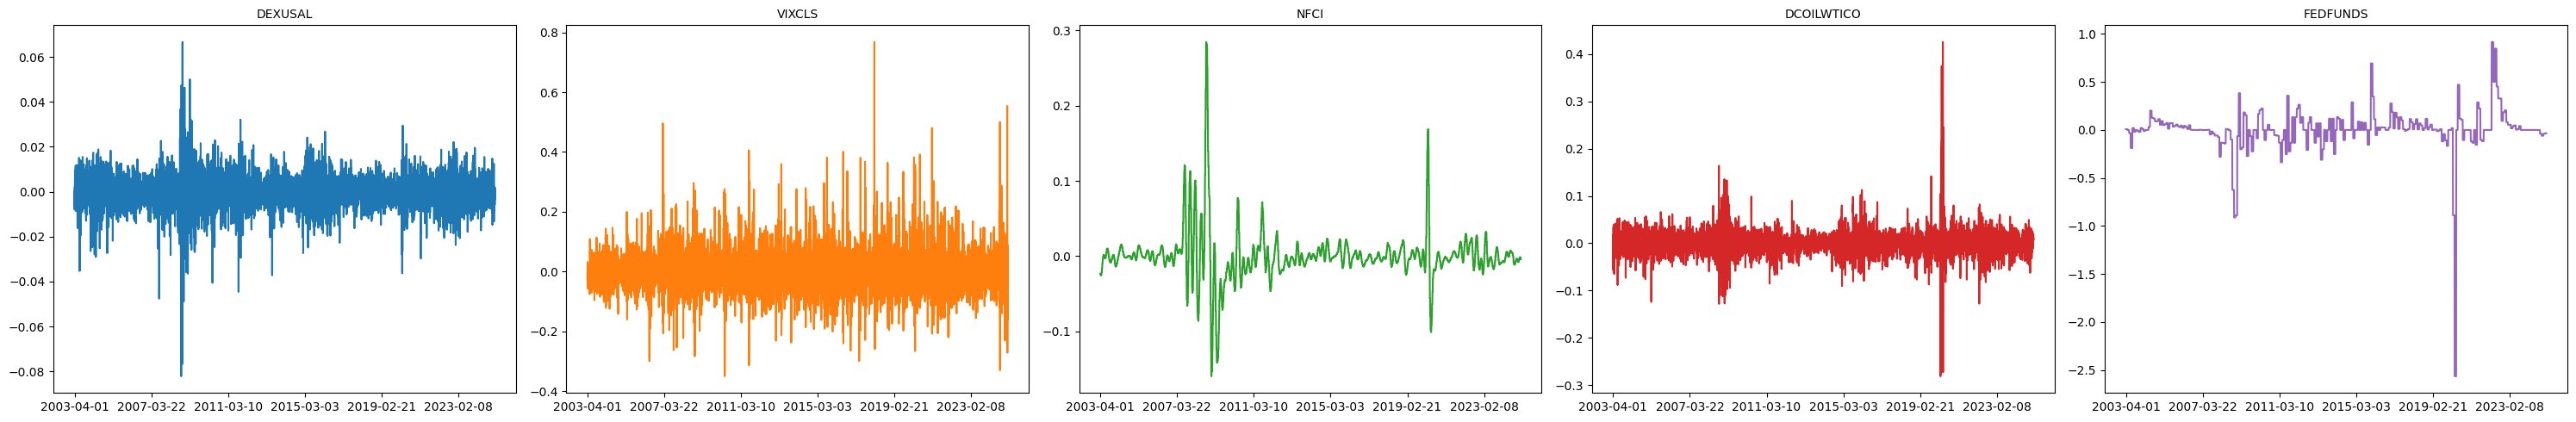

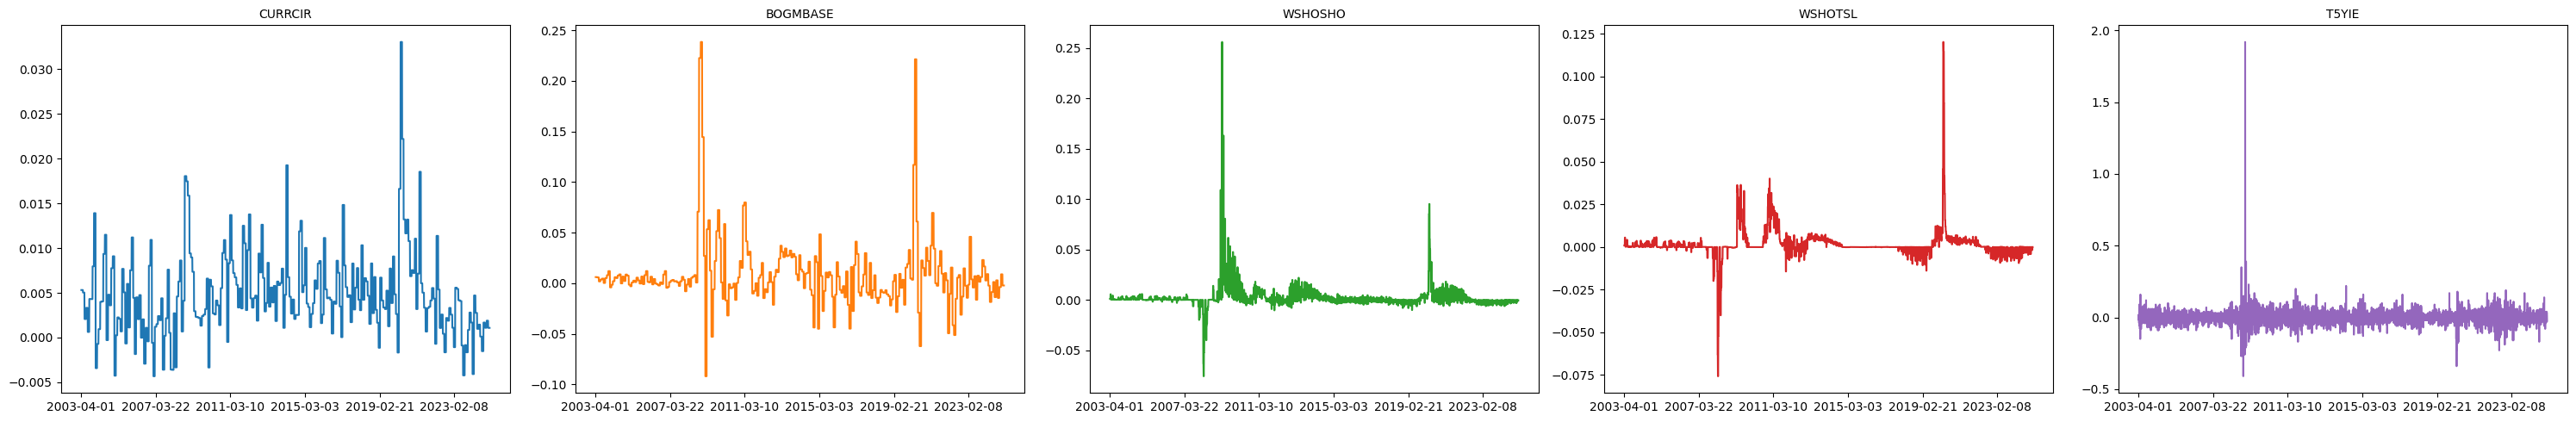

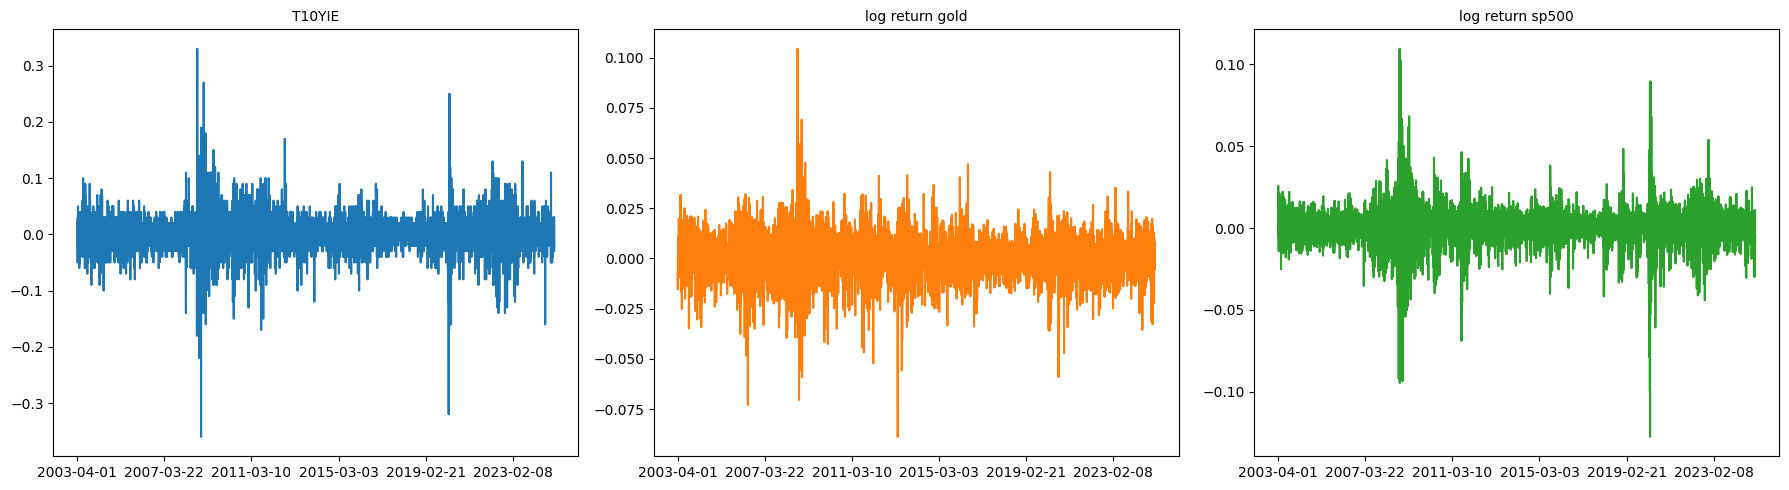

In [203]:
 
n_figs = int(dus.shape[1]/5) +1

for i in range(n_figs):
    subset = dus.iloc[:, i*5 : (i+1)*5]
    axes = subset.plot(subplots=True, layout=(1,5), figsize=(30,5), legend=False)

    # si pandas renvoie une liste (cas 1D), convertir en tableau
    axes = np.array(axes).flatten()
    
    for ax, col in zip(axes, subset.columns):
        ax.set_title(col, fontsize=10)
    
    # masquer cases vides si < 9 séries dans la figure
    for ax in axes[len(subset.columns):]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()


We can check correlation within features:

<Axes: >

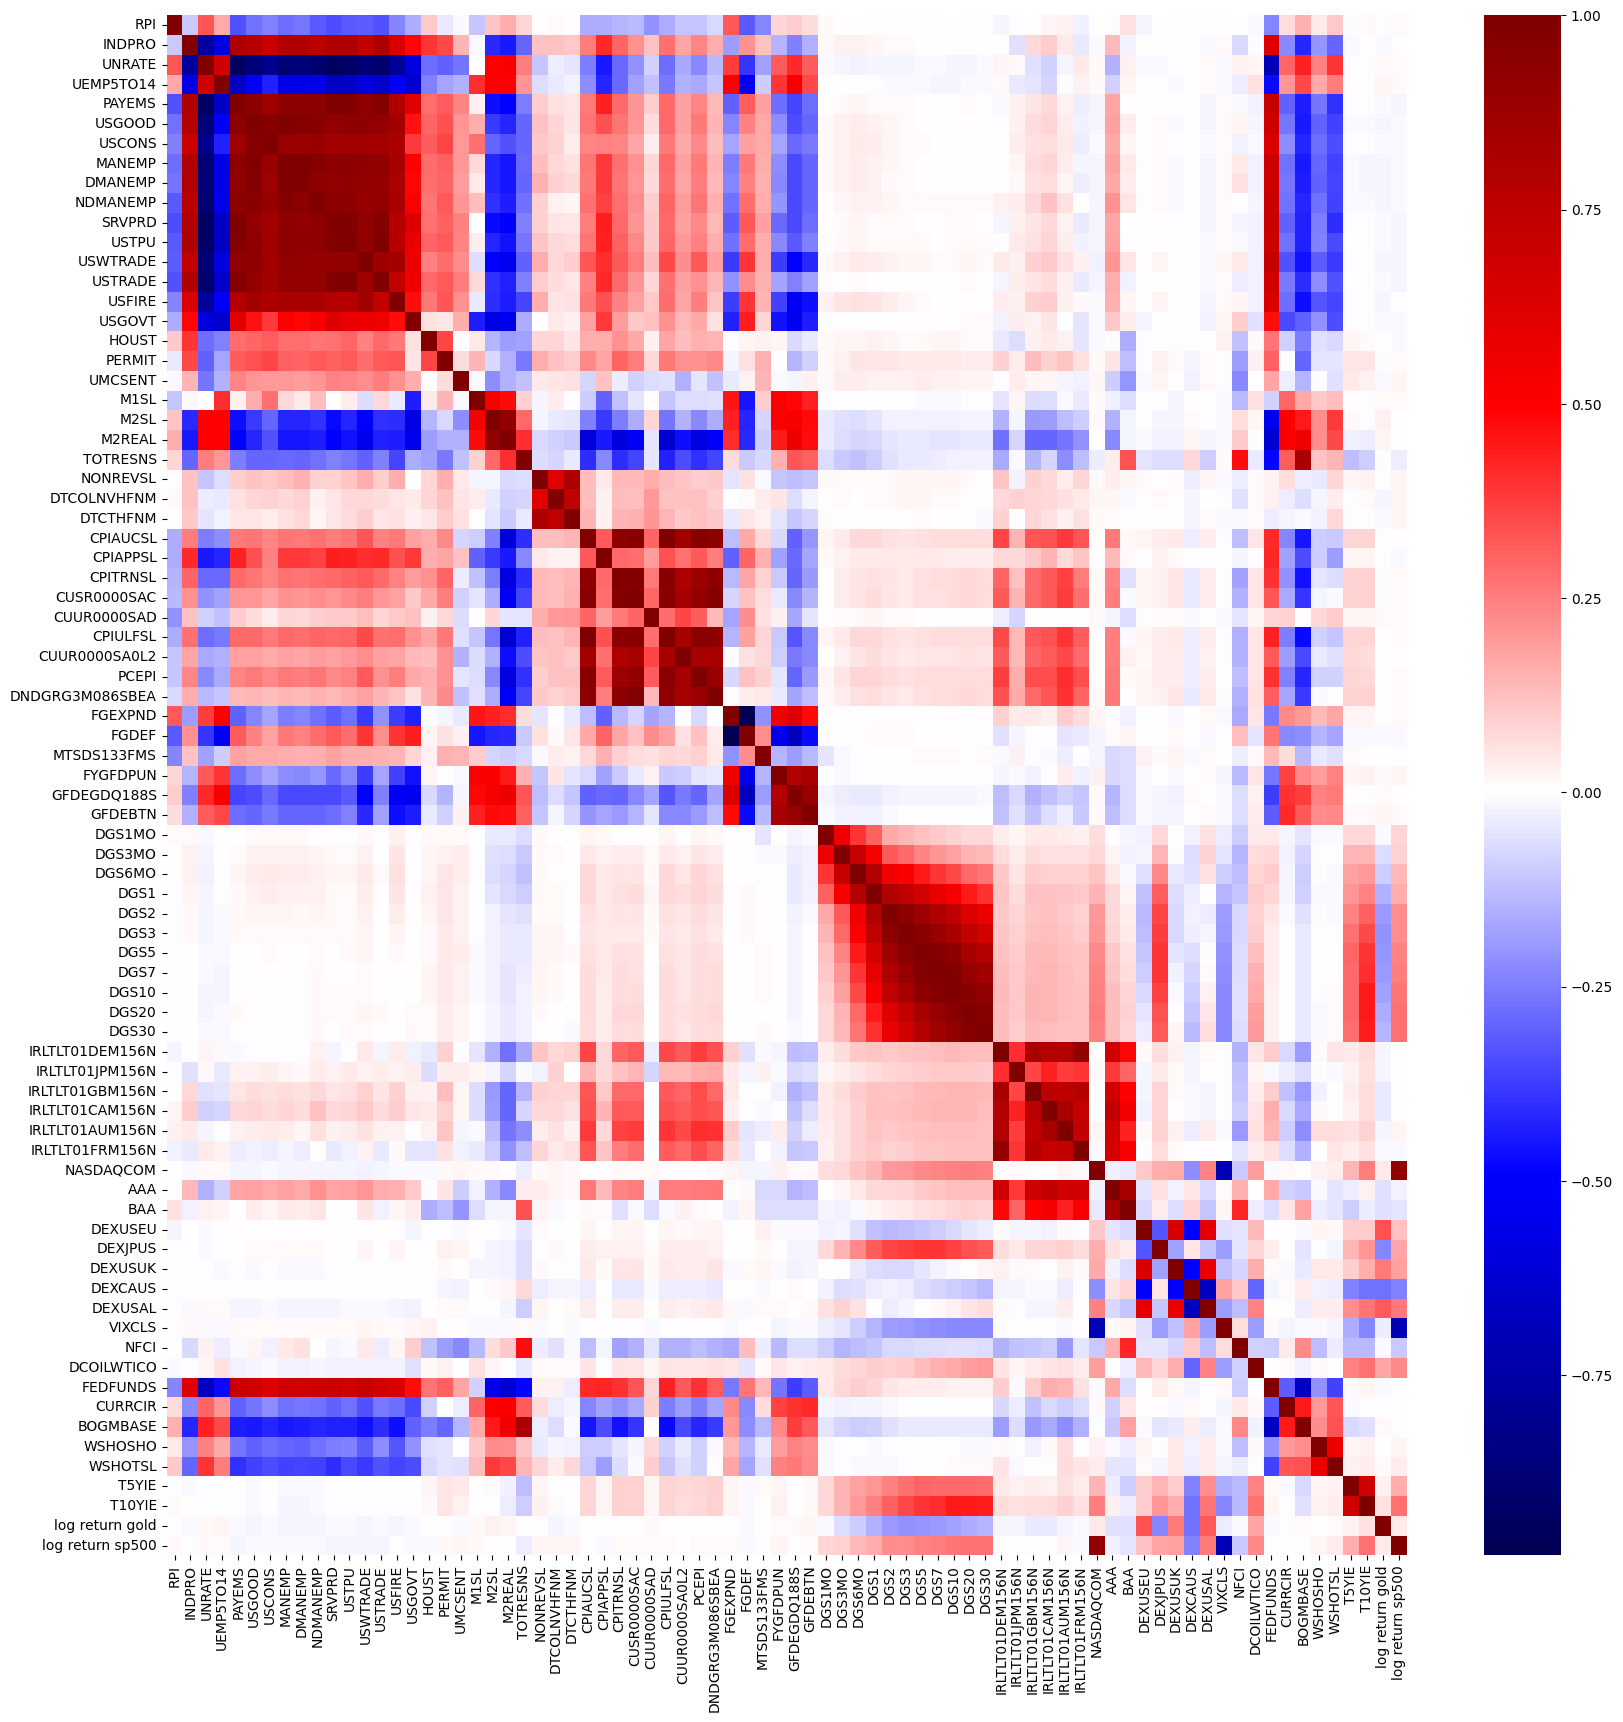

In [204]:
plt.figure(figsize = (20,20))
sns.heatmap(dus.corr(), cmap='seismic', center=0)

A few preliminary remarks: Since we want our models to be interpretable, we'll remove very correlated variables without combining them through a PCA for now. We might later combine features but for now we'll only remove the most redundant ones. 
- INDPRO, RPI, UEMP5TO14 have no correlation with yields, we will remove them. 
- UNRATE is very correlated PAYEMS = NFP variable and USGOOD,..., USGOVT which is the breakdown of NFP per economic sector. These are very redundant and not correlated at all with the yields so we will only keep UNRATE. 
- we will remove HOUST as it is correlated to PERMIT but not to the yields. 
- M2SL and M2REAL are very correlated, we'll remove M2REAL
- 'NONREVSL', 'DTCOLNVHFNM', 'DTCTHFNM' are variables related to liabilities of companies and households are not correlated at all to yields. We'll remove them.
- among inflation features, we may keep only CPIAUCSL, and not the breakdown per sector 'CPITRNSL','CPIMEDSL', 'CUSR0000SAC', 'CUUR0000SAD', 'CUSR0000SAS', 'CPIULFSL', 'CUUR0000SA0L2', 'CUSR0000SA0L5'. 
- FGDEF and FGEXPND = quarterly federal saving and expenditures are very anticorrelated. We'll remove the latter.
-  'FYGFDPUN', (federal debt held by the public, quarterly) ,'GFDEGDQ188S', (#debt to gdp ratio, quarterly), 'GFDEBTN', (total debt outstanding, monthly) are also very correlated so we will keep only 'GFDEGDQ188S'.
- yields of other developped countries 'IRLTLT01DEM156N', 'IRLTLT01JPM156N', 'IRLTLT01GBM156N','IRLTLT01CAM156N','IRLTLT01AUM156N', 'IRLTLT01FRM156N', are also very correlated and are correlated in the same way to US yields. For now we will keep only Japan and Germany yield.
- NASDAQ and SP500 log returns are very correlated ans are correlated in the same way to US yields. We'll remove NASDAQ. 
-DEXCAUS is very anticorrelated to USD/CAD and USD/GBP exchange rates without prodiving any additional information on yields so we will remove it. 
- finally we'll also remove T5YIE, WSHOSHO and BOGMBASE as they are correlated and redundant with other variables. 






In [205]:
variables_to_remove = ['RPI',
                       'INDPRO',
                       'HOUST',
                       'PAYEMS',
                    'UEMP5TO14',
                    'USGOOD',   
                    'USCONS',
                    'MANEMP',
                    'DMANEMP',
                    'NDMANEMP',
                    'SRVPRD',
                    'USTPU',
                    'USWTRADE',
                    'USTRADE',
                    'USFIRE',
                    'USGOVT',
                    'M1SL',
                    'M2REAL',
                    'NONREVSL',
                    'DTCOLNVHFNM', 
                    'DTCTHFNM',
                    'CPITRNSL',
                    'CUUR0000SAD', 
                    'CUSR0000SAC',
                    'CPIAPPSL',
                    'CPIULFSL', 
                    'CUUR0000SA0L2', 
                    'PCEPI',
                    'DNDGRG3M086SBEA',
                    'MTSDS133FMS',
                    'GFDEBTN',
                    'FYGFDPUN',
                    'FGDEF',
                    'FGEXPND',
                    'IRLTLT01GBM156N',
                    'IRLTLT01CAM156N',
                    'IRLTLT01AUM156N', 
                    'IRLTLT01FRM156N',
                    'NASDAQCOM',
                    'DEXCAUS',
                    'T5YIE', 
                    'WSHOSHO',
                    'BOGMBASE',
                    'WSHOTSL',
                    'CURRCIR'
                    ]

We can remove these columns and see what our heatmap looks like now. 

In [206]:
dus.columns

Index(['RPI', 'INDPRO', 'UNRATE', 'UEMP5TO14', 'PAYEMS', 'USGOOD', 'USCONS',
       'MANEMP', 'DMANEMP', 'NDMANEMP', 'SRVPRD', 'USTPU', 'USWTRADE',
       'USTRADE', 'USFIRE', 'USGOVT', 'HOUST', 'PERMIT', 'UMCSENT', 'M1SL',
       'M2SL', 'M2REAL', 'TOTRESNS', 'NONREVSL', 'DTCOLNVHFNM', 'DTCTHFNM',
       'CPIAUCSL', 'CPIAPPSL', 'CPITRNSL', 'CUSR0000SAC', 'CUUR0000SAD',
       'CPIULFSL', 'CUUR0000SA0L2', 'PCEPI', 'DNDGRG3M086SBEA', 'FGEXPND',
       'FGDEF', 'MTSDS133FMS', 'FYGFDPUN', 'GFDEGDQ188S', 'GFDEBTN', 'DGS1MO',
       'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', 'DGS7', 'DGS10',
       'DGS20', 'DGS30', 'IRLTLT01DEM156N', 'IRLTLT01JPM156N',
       'IRLTLT01GBM156N', 'IRLTLT01CAM156N', 'IRLTLT01AUM156N',
       'IRLTLT01FRM156N', 'NASDAQCOM', 'AAA', 'BAA', 'DEXUSEU', 'DEXJPUS',
       'DEXUSUK', 'DEXCAUS', 'DEXUSAL', 'VIXCLS', 'NFCI', 'DCOILWTICO',
       'FEDFUNDS', 'CURRCIR', 'BOGMBASE', 'WSHOSHO', 'WSHOTSL', 'T5YIE',
       'T10YIE', 'log return gold', 'log return sp

<Axes: >

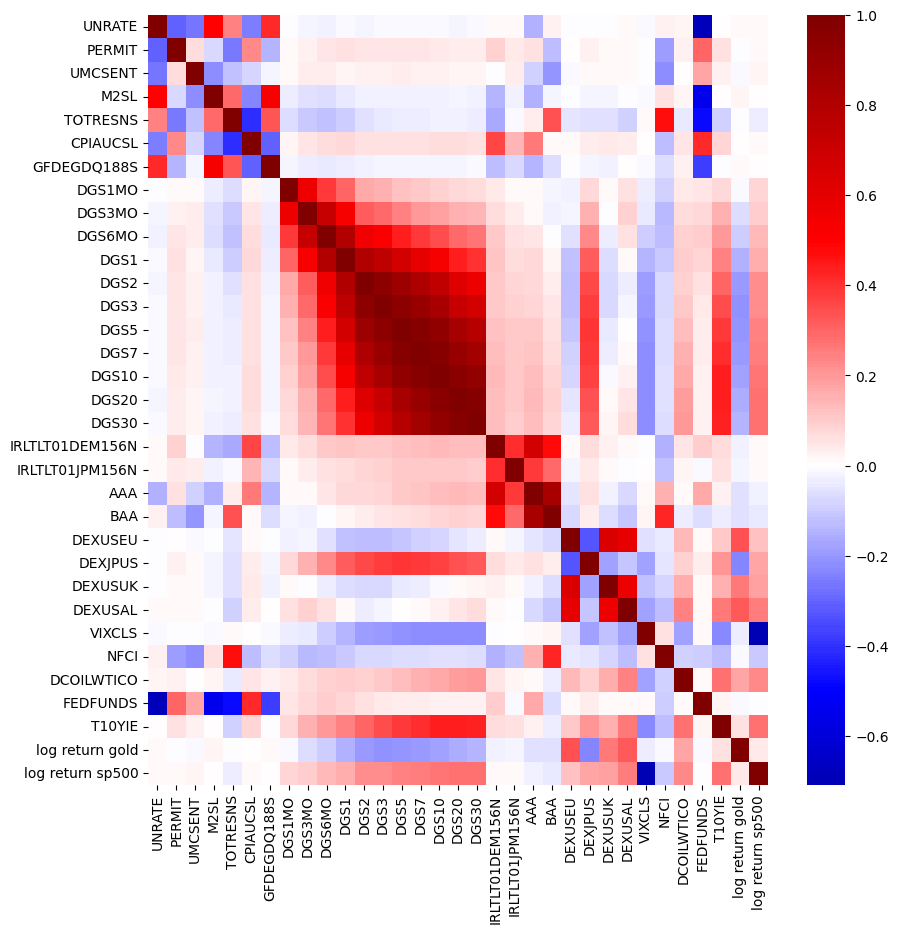

In [207]:
dus = dus.drop(columns=variables_to_remove)
plt.figure(figsize = (10,10))
sns.heatmap(dus.corr(), cmap='seismic', center=0)

Now we need to add the lagged values of yields as features. We have to choose lags and yields to add as features. 

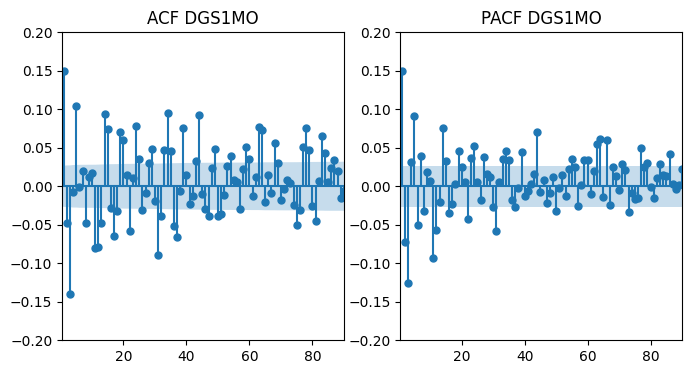

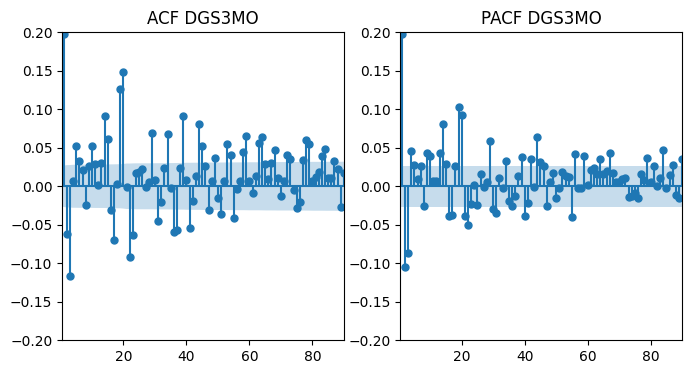

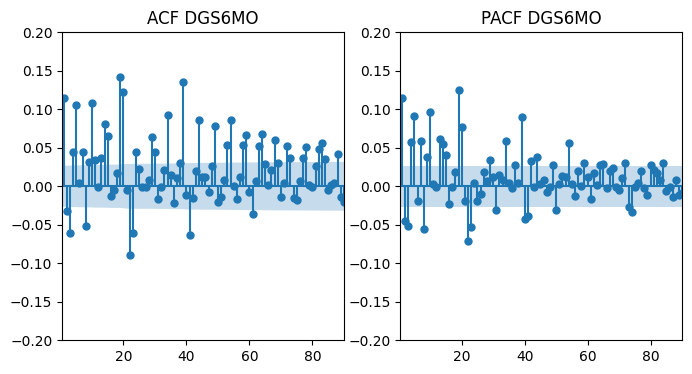

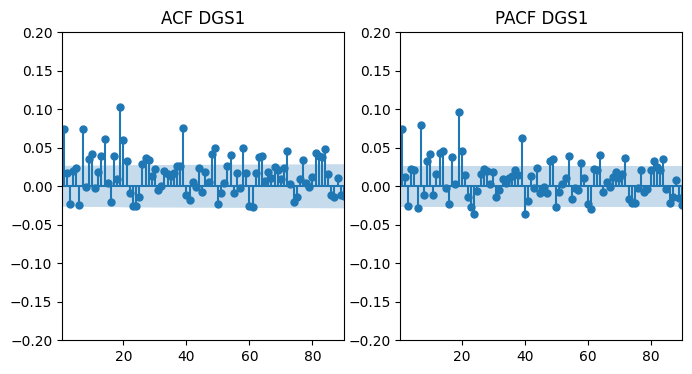

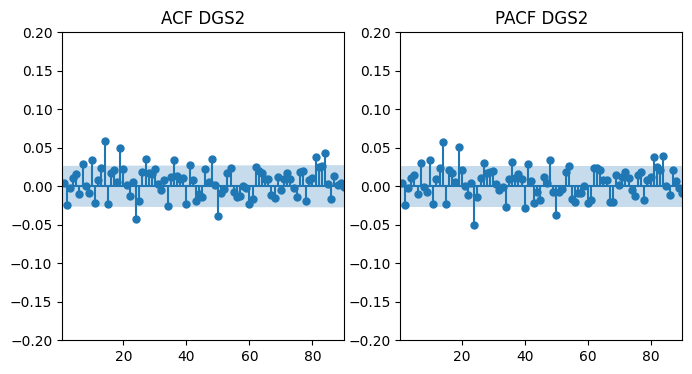

KeyboardInterrupt: 

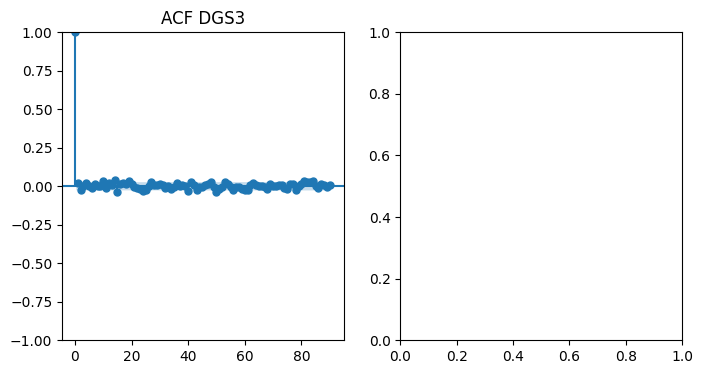

In [208]:

for USyield in ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3','DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30']:
    series = dus[USyield]
    fig, axes = plt.subplots(1,2, figsize=(8,4))
    plot_acf(series, lags=90,title = f'ACF {USyield}', ax = axes[0])
    plot_pacf(series, lags=90,title = f'PACF {USyield}',ax = axes[1])

    for ax in axes:
        ax.set_xlim(0.5, 90)  # décale le début après 0
        ax.set_ylim(-0.2, 0.2) 

        if USyield in ['DGS5','DGS7','DGS10', 'DGS20', 'DGS30']:
            
            ax.axvline(x=25, color='red', linestyle='--', linewidth=1)
            ax.axvline(x=50, color='red', linestyle='--', linewidth=1)

    
    plt.show()


- We can see that on short term yields, there is much more autocorrelation in the data, up to more than 30 days. Returns in the past few days are highly correlated to returns in the next days. 
- However, on long term yields, there is much less autocorrelation and returns in the past 2 days are only slightly correlated to next day return. Surprisingly we see some persistent autocorrelation between returns at day t and t-25 and t-50. 

For maturities less than 1y, we'll add the following lags:
- t-1,t-2,t-5,t-10,t-15,t-20,t-25,t-30,t-40,t-50

For maturities more than 1y, we will add:
- t-1,t-2,t-10,t-25,t-50

We will probably need to do some PCA to combine features as they will be very correlated.

In [ ]:
for lag in [1,2,5,10,15,20,25,30,40,50]:
    dus[f'DGS1MO_t-{lag}'] = dus['DGS1MO'].shift(lag-1)
    dus[f'DGS3MO_t-{lag}'] = dus['DGS3MO'].shift(lag-1)
    dus[f'DGS6MO_t-{lag}'] = dus['DGS6MO'].shift(lag-1)
    dus[f'DGS1_t-{lag}'] = dus['DGS1'].shift(lag-1)
  

for lag in [1,2,10,15,25,50]:
    dus[f'DGS1_t-{lag}'] = dus['DGS1'].shift(lag-1)
    dus[f'DGS2_t-{lag}'] = dus['DGS2'].shift(lag-1)
    dus[f'DGS3_t-{lag}'] = dus['DGS3'].shift(lag-1)
    dus[f'DGS5_t-{lag}'] = dus['DGS5'].shift(lag-1)
    dus[f'DGS7_t-{lag}'] = dus['DGS7'].shift(lag-1)
    dus[f'DGS10_t-{lag}'] = dus['DGS10'].shift(lag-1)
    dus[f'DGS20_t-{lag}'] = dus['DGS20'].shift(lag-1)
    dus[f'DGS30_t-{lag}'] = dus['DGS30'].shift(lag-1)

In [ ]:
#creating variables to forecast 

dus['Y_1MO'] = dus['DGS1MO'].shift(-1)
dus['Y_3MO'] = dus['DGS3MO'].shift(-1)
dus['Y_6MO'] = dus['DGS6MO'].shift(-1)
dus['Y_1year'] = dus['DGS1'].shift(-1)
dus['Y_2year'] = dus['DGS2'].shift(-1)
dus['Y_3year'] = dus['DGS3'].shift(-1)
dus['Y_5year'] = dus['DGS5'].shift(-1)
dus['Y_7year'] = dus['DGS7'].shift(-1)
dus['Y_10year'] = dus['DGS10'].shift(-1)
dus['Y_20year'] = dus['DGS20'].shift(-1)
dus['Y_30year'] = dus['DGS30'].shift(-1)

In [ ]:
#we can now remove the original yield columns
dus = dus.drop(columns=['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3','DGS5', 'DGS7', 'DGS10', 'DGS20', 'DGS30'])

We can look at the heatmap with newly lagged features to see how informative lagged values will be:

<Axes: >

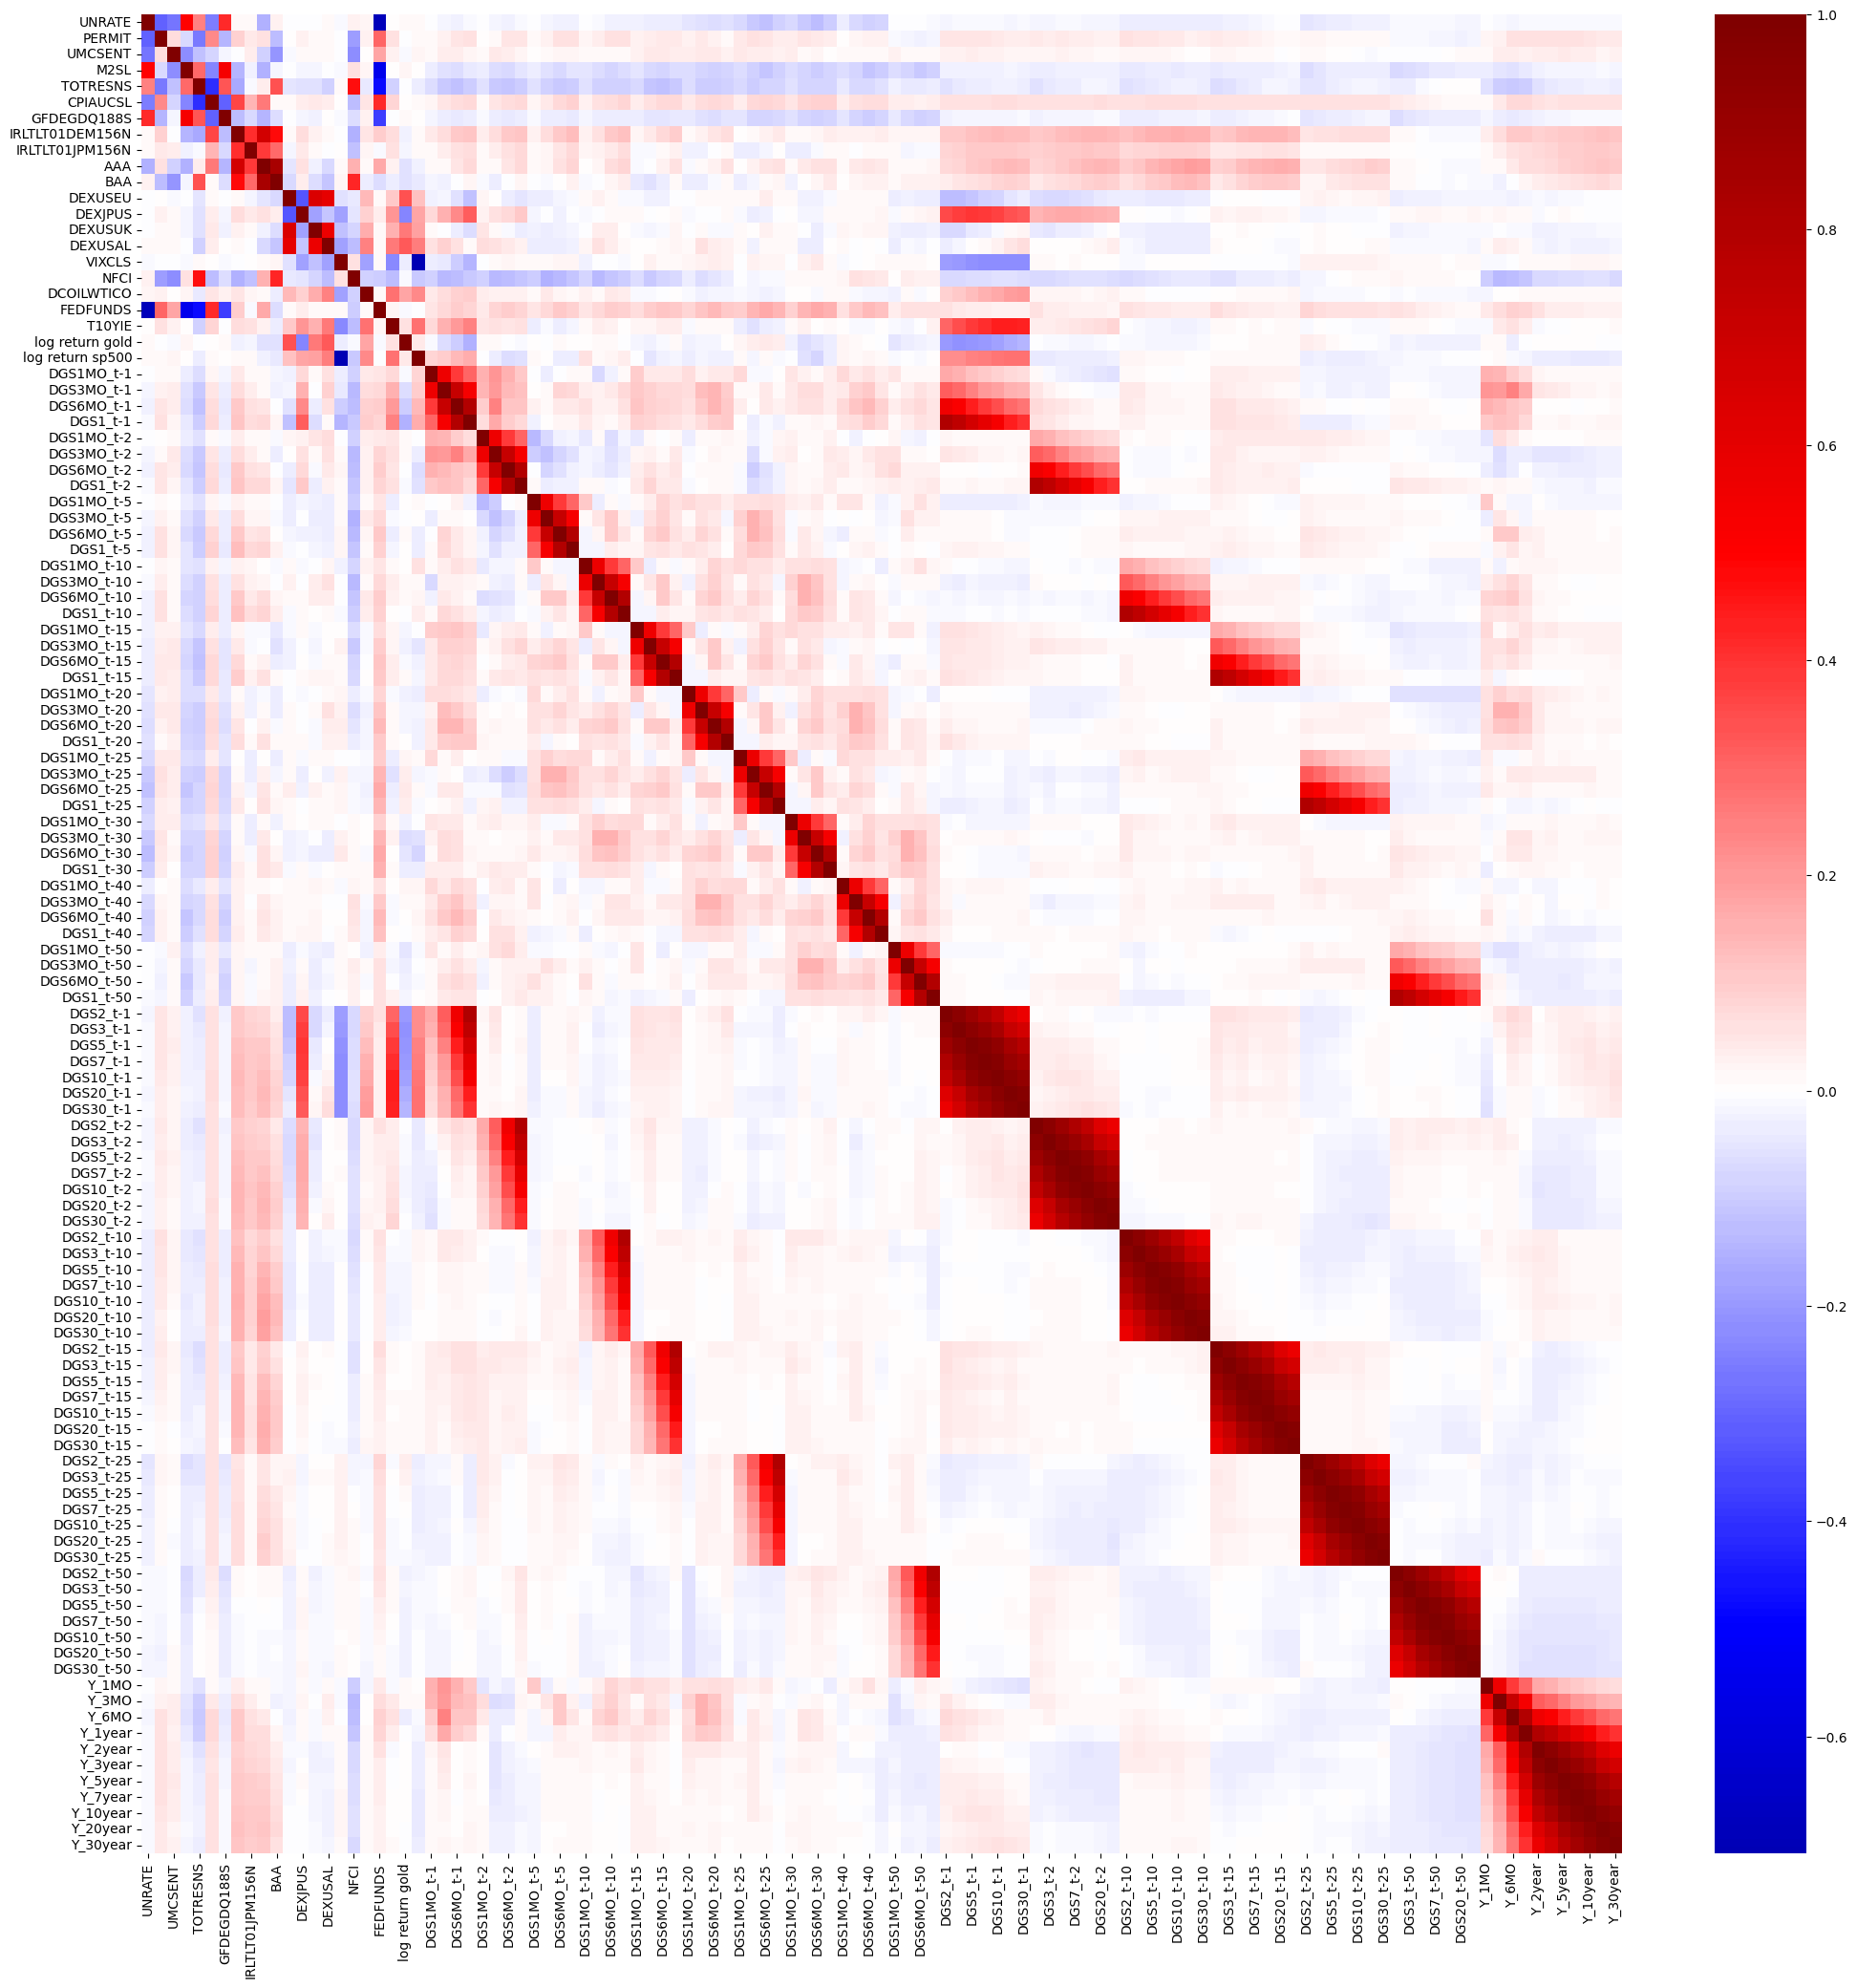

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(dus.corr(), cmap='seismic', center=0)

Given the very high correlation between lagged features, we'll apply a PCA in the pipeline on those to limit the number of colinear features.

Once last thing that we do to reduce the number of features: we'll remove:
- the lagged features that have a correlation coefficient < 0.05 in absolute value with all target variables. 
- the other features that have a correlation coefficient < 0.03 in absolute value with all target variables. We do a distinction between lagged features and other features because filtering all features with the 0.05 threshold removes somes features that should have a predictive impact: sp500, gold, VIX for instance. 

In [ ]:
Y = dus[['Y_1MO', 'Y_3MO', 'Y_6MO', 'Y_1year', 'Y_2year', 'Y_3year', 'Y_5year', 'Y_7year', 'Y_10year', 'Y_20year', 'Y_30year']]
dus_lagged_features = dus[[col for col in dus.columns if '_t-' in col]]
dus_other =dus.drop(columns=[col for col in dus.columns if '_t-' in col])

corrs = pd.DataFrame({
    target: dus_lagged_features.corrwith(Y[target]) for target in Y.columns
}).abs()  

# repérer les colonnes où la corrélation absolue < 0.05 pour toutes les targets
mask = (corrs < 0.05).all(axis=1)
low_corr_features = corrs.index[mask]

# supprimer ces colonnes
dus_filtered = dus.drop(columns=low_corr_features)



corrs = pd.DataFrame({
    target: dus_other.corrwith(Y[target]) for target in Y.columns
}).abs()  

# repérer les colonnes où la corrélation absolue < 0.05 pour toutes les targets
mask = (corrs < 0.03).all(axis=1)
low_corr_features_2 = corrs.index[mask]

# supprimer ces colonnes
dus_filtered = dus_filtered.drop(columns=low_corr_features_2)

print(f"{len(low_corr_features) + len(low_corr_features_2)} features were deleted")

56 features were deleted


<Axes: >

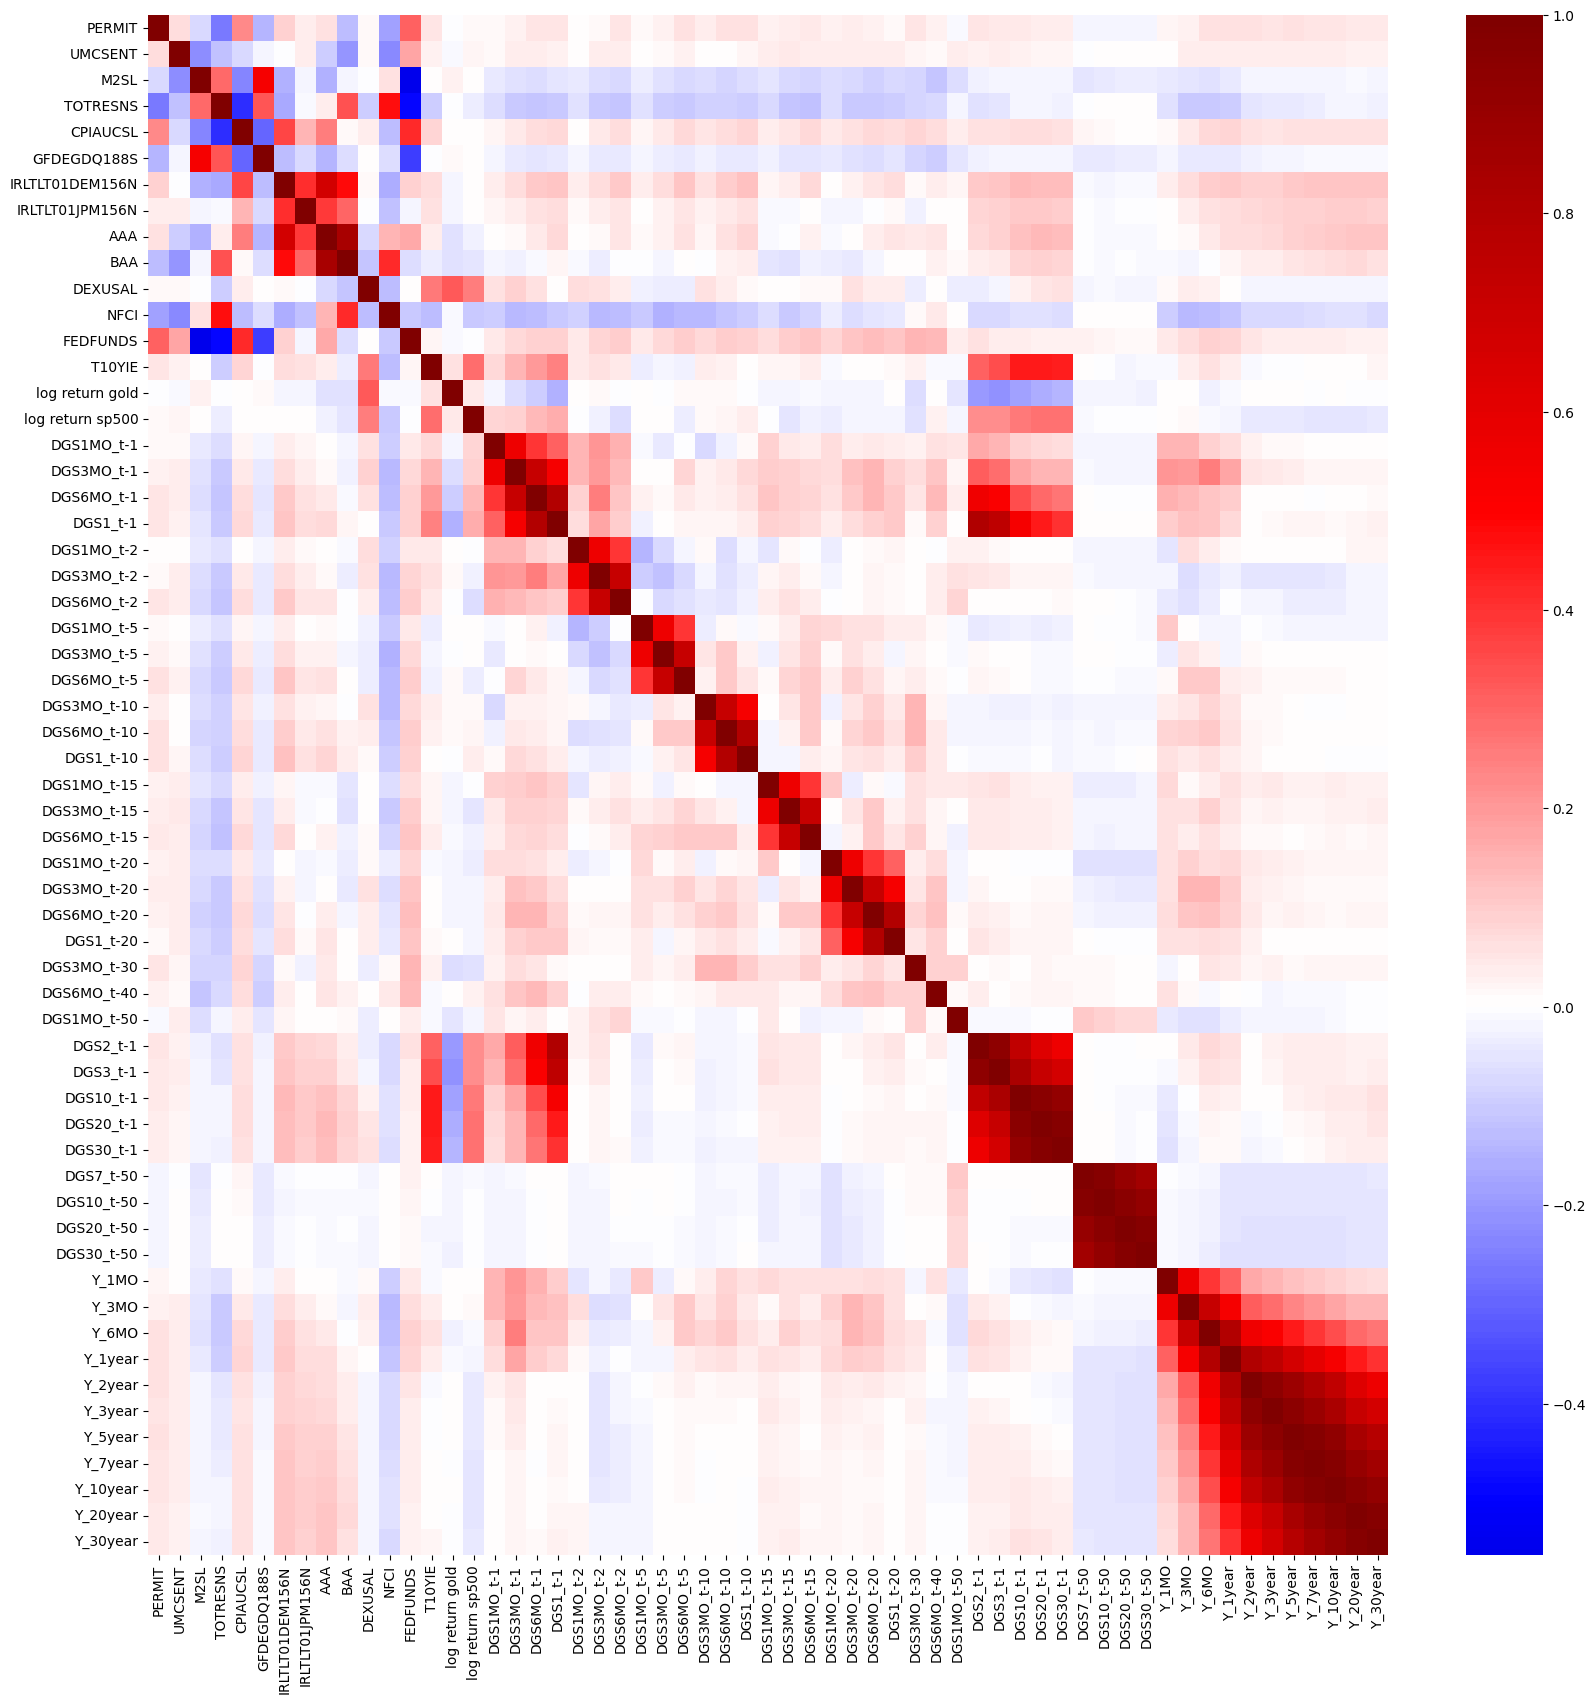

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(dus_filtered.corr(), cmap='seismic', center=0)

In [ ]:
columns_lagged_features = [col for col in dus.columns if '_t-' in col]

In [ ]:
dus_filtered.columns

Index(['PERMIT', 'UMCSENT', 'M2SL', 'TOTRESNS', 'CPIAUCSL', 'GFDEGDQ188S',
       'IRLTLT01DEM156N', 'IRLTLT01JPM156N', 'AAA', 'BAA', 'DEXUSAL', 'NFCI',
       'FEDFUNDS', 'T10YIE', 'log return gold', 'log return sp500',
       'DGS1MO_t-1', 'DGS3MO_t-1', 'DGS6MO_t-1', 'DGS1_t-1', 'DGS1MO_t-2',
       'DGS3MO_t-2', 'DGS6MO_t-2', 'DGS1MO_t-5', 'DGS3MO_t-5', 'DGS6MO_t-5',
       'DGS3MO_t-10', 'DGS6MO_t-10', 'DGS1_t-10', 'DGS1MO_t-15', 'DGS3MO_t-15',
       'DGS6MO_t-15', 'DGS1MO_t-20', 'DGS3MO_t-20', 'DGS6MO_t-20', 'DGS1_t-20',
       'DGS3MO_t-30', 'DGS6MO_t-40', 'DGS1MO_t-50', 'DGS2_t-1', 'DGS3_t-1',
       'DGS10_t-1', 'DGS20_t-1', 'DGS30_t-1', 'DGS7_t-50', 'DGS10_t-50',
       'DGS20_t-50', 'DGS30_t-50', 'Y_1MO', 'Y_3MO', 'Y_6MO', 'Y_1year',
       'Y_2year', 'Y_3year', 'Y_5year', 'Y_7year', 'Y_10year', 'Y_20year',
       'Y_30year'],
      dtype='object')

# Training a ridge model

In [ ]:
dus_filtered = dus_filtered.dropna()
X = dus_filtered[['PERMIT', 'UMCSENT', 'M2SL', 'TOTRESNS', 'CPIAUCSL', 'GFDEGDQ188S',
       'IRLTLT01DEM156N', 'IRLTLT01JPM156N', 'AAA', 'BAA', 'DEXUSAL', 'NFCI',
       'FEDFUNDS', 'T10YIE', 'log return gold', 'log return sp500',
       'DGS1MO_t-1', 'DGS3MO_t-1', 'DGS6MO_t-1', 'DGS1_t-1', 'DGS1MO_t-2',
       'DGS3MO_t-2', 'DGS6MO_t-2', 'DGS1MO_t-5', 'DGS3MO_t-5', 'DGS6MO_t-5',
       'DGS3MO_t-10', 'DGS6MO_t-10', 'DGS1_t-10', 'DGS1MO_t-15', 'DGS3MO_t-15',
       'DGS6MO_t-15', 'DGS1MO_t-20', 'DGS3MO_t-20', 'DGS6MO_t-20', 'DGS1_t-20',
       'DGS3MO_t-30', 'DGS6MO_t-40', 'DGS1MO_t-50', 'DGS2_t-1', 'DGS3_t-1',
       'DGS10_t-1', 'DGS20_t-1', 'DGS30_t-1', 'DGS7_t-50', 'DGS10_t-50',
       'DGS20_t-50', 'DGS30_t-50']]

Y = dus_filtered[['Y_1MO', 'Y_3MO', 'Y_6MO', 'Y_1year', 'Y_2year', 'Y_3year', 'Y_5year', 'Y_7year', 'Y_10year', 'Y_20year', 'Y_30year']]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from tqdm import tqdm 

In [210]:


window_train = 252 * 12   
window_pred = 21          
alphas = np.logspace(-3, 3, 20)

pipe = Pipeline([
    ('scaler',StandardScaler()),
    #('pca',PCA(n_components=0.95)),    #for now no PCA, we'll try with PCA after
    ('ridge', MultiOutputRegressor(RidgeCV(fit_intercept=False,alphas=alphas)))
])

preds = []
dates_pred = []
r2_is_list = []
r2_os_list=[]
hit_rate_list = []

for start in tqdm(range(0, len(X) - window_train - window_pred + 1, window_pred)):
  
    end_train = start + window_train
    end_pred = end_train + window_pred

    X_train = X.iloc[start:end_train]
    Y_train = Y.iloc[start:end_train]

    X_test = X.iloc[end_train:end_pred]
    Y_test = Y.iloc[end_train:end_pred]

    pipe.fit(X_train, Y_train)

    Y_pred = pipe.predict(X_test)

    preds.append(Y_pred)
    dates_pred.append(X.index[end_train:end_pred])


    #metriques de performance
    mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
    r2_is = r2_score(Y_train, pipe.predict(X_train), multioutput='raw_values')
    r2_oos = r2_score(Y_test, Y_pred, multioutput='raw_values')
    hit_rate = np.mean(np.sign(Y_test.values) == np.sign(Y_pred), axis=0)
    r2_is_list.append(r2_is)
    r2_os_list.append(r2_oos)
    hit_rate_list.append(hit_rate)





  0%|          | 0/114 [00:00<?, ?it/s]

100%|██████████| 114/114 [00:40<00:00,  2.83it/s]


In [220]:
dates_pred

[Index(['2015-06-16', '2015-06-17', '2015-06-18', '2015-06-19', '2015-06-22',
        '2015-06-23', '2015-06-24', '2015-06-25', '2015-06-26', '2015-06-29',
        '2015-06-30', '2015-07-01', '2015-07-02', '2015-07-06', '2015-07-07',
        '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-13', '2015-07-14',
        '2015-07-15'],
       dtype='object'),
 Index(['2015-07-16', '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22',
        '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28', '2015-07-29',
        '2015-07-30', '2015-07-31', '2015-08-03', '2015-08-04', '2015-08-05',
        '2015-08-06', '2015-08-07', '2015-08-10', '2015-08-11', '2015-08-12',
        '2015-08-13'],
       dtype='object'),
 Index(['2015-08-14', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
        '2015-08-21', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27',
        '2015-08-28', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03',
        '2015-09-04', '2015-09-08', '2015-09-09'

<Axes: title={'center': 'Evolution of in sample R2 per model, per sample'}>

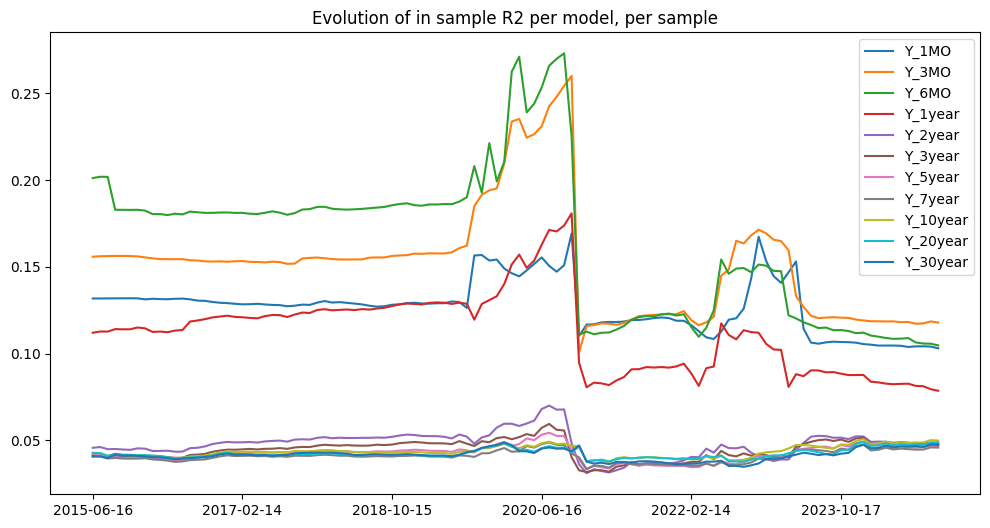

In [224]:
r2_is_df = pd.DataFrame(r2_is_list)  # shape = (10 modèles, n_samples)
r2_is_df.columns = Y.columns
r2_is_df.index = [date[0] for date in dates_pred]
r2_is_df.plot(figsize=(12,6), title = 'Evolution of in sample R2 per model, per sample')

- When looking at the in sample R2 of our models, we see that the R2 is overall low, but that it is better on short term yields, ie from 1 month to 1 year, and significantly lower for long-term yields. 
- we see a significant drop in R2 after covid, probably because the outliers values during this period prevent the model from working properly.

<Axes: title={'center': 'Evolution of out-sample R2 per model, per sample'}>

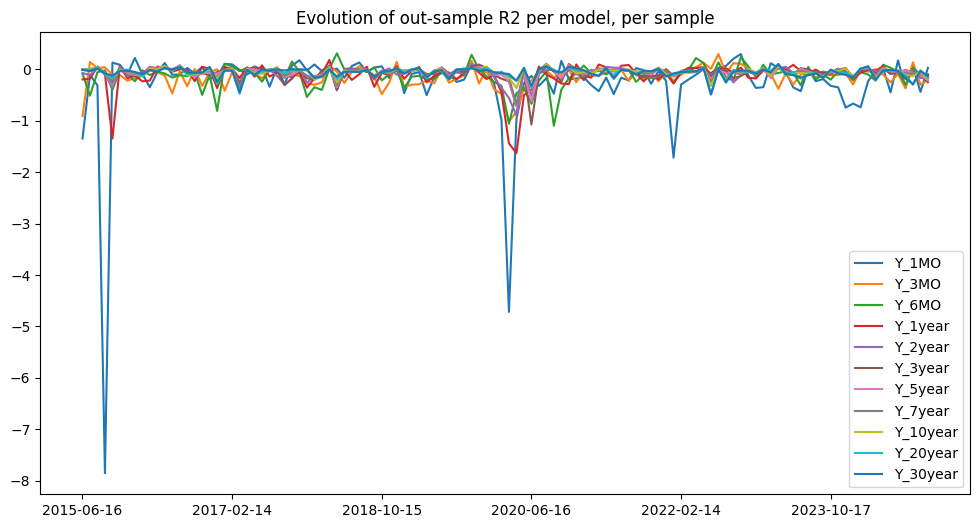

In [227]:
r2_os_df = pd.DataFrame(r2_os_list)  # shape = (10 modèles, n_samples)
r2_os_df.columns = Y.columns
r2_os_df.index = [date[0] for date in dates_pred]
r2_os_df.plot(figsize=(12,6), title = 'Evolution of out-sample R2 per model, per sample')

<Axes: title={'center': 'Evolution of out-sample hit rate per model, per sample'}>

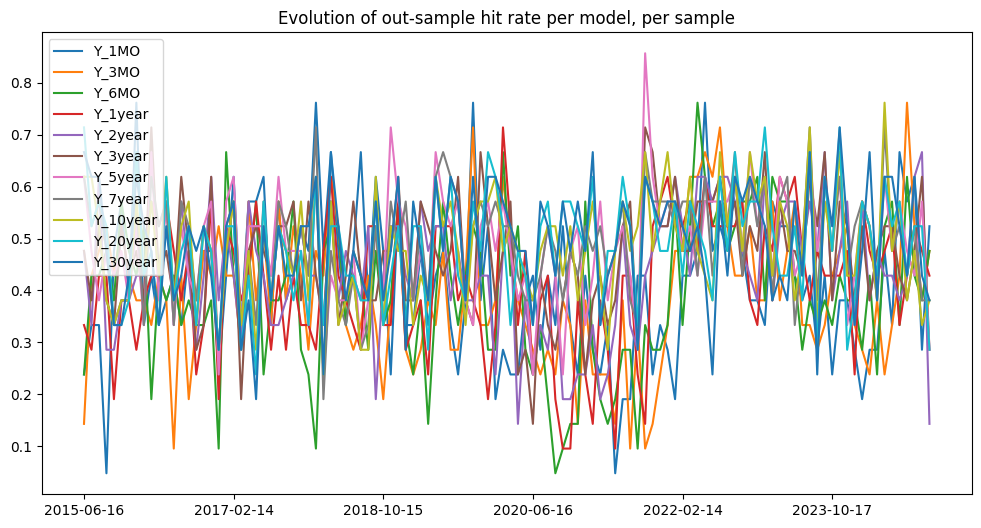

In [228]:
hr = pd.DataFrame(hit_rate_list)  # shape = (10 modèles, n_samples)
hr.columns = Y.columns
hr.index = [date[0] for date in dates_pred]
hr.plot(figsize=(12,6), title = 'Evolution of out-sample hit rate per model, per sample')

The hit rate seems to be close to 0.5 on average for all models and all samples. So it appears the model does not do anything better than predicting at random - it completely overfits the data.

Ideas of features combinations that can be done later: 
- we can combine yields of developped countries in a same feature 'IRLTLT01DEM156N', 'IRLTLT01JPM156N', 'IRLTLT01GBM156N','IRLTLT01CAM156N','IRLTLT01AUM156N', 'IRLTLT01FRM156N'. 
- AAA and BAA yields are very correlated but they are not correlated the same way to US yields.
- the macro features 'UNRATE', 'PERMIT', 'UMCSENT', 'M2SL', 'TOTRESNS', 'CPIAUCSL', 'GFDEGDQ188S' are overall very correlated with the 'FEDFUNDS' feature, maybe we could combine them later. 

